In [1]:
pip install mtgsdk

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mtgsdk: filename=mtgsdk-1.3.1-py3-none-any.whl size=13689 sha256=539bc4c71970cf983a54527eadd9cac9229201696c6c0a3efa115720f2d3326a
  Stored in directory: c:\users\pgendotti\appdata\local\pip\cache\wheels\c1\ed\70\3f40e093855169c292f758c628f340a918a7eb485e856a2d3c
Successfully built mtgsdk
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from mtgsdk import Card
from mtgsdk import Set
from mtgsdk import Type
from mtgsdk import Supertype
from mtgsdk import Subtype
from mtgsdk import Changelog
import pandas as pd

In [3]:
card = Card.find(386616)
card

In [4]:
cols = ["name", "multiverse_id", "layout", "names", "mana_cost", "cmc", "colors", "color_identity", "type", "supertypes", 
        "subtypes", "rarity", "text", "flavor", "artist", "number", "power", "toughness", "loyalty", "variations", "watermark",
        "border", "timeshifted", "hand", "life", "reserved", "release_date", "starter", "rulings", "foreign_names", "printings", 
        "original_text", "original_type", "legalities", "source", "image_url", "set", "set_name", "id"]

for col in cols:
    try:
        print(col, getattr(card, col))
    except:
        print(col + " None")

name Narset, Enlightened Master
multiverse_id 386616
layout normal
names None
mana_cost {3}{U}{R}{W}
cmc 6.0
colors ['R', 'U', 'W']
color_identity ['R', 'U', 'W']
type Legendary Creature — Human Monk
supertypes ['Legendary']
subtypes ['Human', 'Monk']
rarity Mythic
text First strike, hexproof
Whenever Narset, Enlightened Master attacks, exile the top four cards of your library. Until end of turn, you may cast noncreature spells from among those cards without paying their mana costs.
flavor None
artist Magali Villeneuve
number 190
power 3
toughness 2
loyalty None
variations None
watermark jeskai
border None
timeshifted None
hand None
life None
reserved None
release_date None
starter None
rulings [{'date': '2014-09-20', 'text': 'Any exiled cards you don’t cast remain in exile.'}, {'date': '2014-09-20', 'text': 'Because you’re already casting the card using an alternative cost (by casting it without paying its mana cost), you can’t pay any other alternative costs for the card, including c

In [5]:
def setCardDict(card, cols):
    card_dict = {}
    for col in cols:
        try:
            card_dict[col] = getattr(card, col)
        except:
            card_dict[col] = None
            
    return card_dict

In [6]:
print(setCardDict(card, cols))

{'name': 'Narset, Enlightened Master', 'multiverse_id': '386616', 'layout': 'normal', 'names': None, 'mana_cost': '{3}{U}{R}{W}', 'cmc': 6.0, 'colors': ['R', 'U', 'W'], 'color_identity': ['R', 'U', 'W'], 'type': 'Legendary Creature — Human Monk', 'supertypes': ['Legendary'], 'subtypes': ['Human', 'Monk'], 'rarity': 'Mythic', 'text': 'First strike, hexproof\nWhenever Narset, Enlightened Master attacks, exile the top four cards of your library. Until end of turn, you may cast noncreature spells from among those cards without paying their mana costs.', 'flavor': None, 'artist': 'Magali Villeneuve', 'number': '190', 'power': '3', 'toughness': '2', 'loyalty': None, 'variations': None, 'watermark': 'jeskai', 'border': None, 'timeshifted': None, 'hand': None, 'life': None, 'reserved': None, 'release_date': None, 'starter': None, 'rulings': [{'date': '2014-09-20', 'text': 'Any exiled cards you don’t cast remain in exile.'}, {'date': '2014-09-20', 'text': 'Because you’re already casting the car

In [7]:
# get all cards
# takes around half an hour!
all_cards = Card.all()
all_cards

 ...]

In [8]:
# number of cards total:
print(len(all_cards))

93643


In [9]:
# convert a test card to a dataframe/series - to be added to the overall df later
card_dict_test = setCardDict(card, cols)
curr_card_df = pd.Series(data=card_dict_test)
curr_card_df

name                                     Narset, Enlightened Master
multiverse_id                                                386616
layout                                                       normal
names                                                          None
mana_cost                                              {3}{U}{R}{W}
cmc                                                             6.0
colors                                                    [R, U, W]
color_identity                                            [R, U, W]
type                                Legendary Creature — Human Monk
supertypes                                              [Legendary]
subtypes                                              [Human, Monk]
rarity                                                       Mythic
text              First strike, hexproof\nWhenever Narset, Enlig...
flavor                                                         None
artist                                          

In [16]:
#test adding series to df
# card_append_test_df = pd.DataFrame(columns=cols)
# check_df = card_append_test_df.append(curr_card_df, ignore_index=True)
# NOTE: append now DEPRECATED!

check_df = pd.DataFrame.from_records([card_dict_test], columns=cols)
check_df

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,"Narset, Enlightened Master",386616,normal,None,{3}{U}{R}{W},6.0,"[R, U, W]","[R, U, W]",Legendary Creature — Human Monk,[Legendary],...,"[{'name': 'Narset, Erleuchtete Meisterin', 'te...","[CMM, KTK, PKTK, SLD]","First strike, hexproof\nWhenever Narset, Enlig...",Legendary Creature — Human Monk,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,http://gatherer.wizards.com/Handlers/Image.ash...,KTK,Khans of Tarkir,15e45fe0-92ea-52dc-8665-7105ac30db70


In [24]:
# setup card dataframe with all columns
# all_cards_df = pd.DataFrame(columns=cols)
# all_cards_df


In [19]:
# add cards to dataframe!
# count = 0
# for card in all_cards:
#     card_dict_test = setCardDict(card, cols)
#     curr_card_df = pd.Series(data=card_dict_test)
#     all_cards_df = all_cards_df.append(curr_card_df, ignore_index=True)
#     count += 1
#     print("{}/{}".format(count, len(all_cards)))

formatted_card_dicts = []

for card in all_cards:
    curr_card_dict = setCardDict(card, cols)
    formatted_card_dicts.append(curr_card_dict)

# batch process (due to deprecated 'append' function)
all_cards_df = pd.DataFrame(formatted_card_dicts, columns=cols)

print(len(all_cards_df))

all_cards_df

93643



,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550,normal,None,{5}{W}{W},7.0,[W],[W],Creature — Human Cleric,None,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","[10E, JUD, UMA]",First strike\nWhen Ancestor's Chosen comes int...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,None,normal,None,{5}{W}{W},7.0,[W],[W],Creature — Human Cleric,None,...,None,"[10E, JUD, UMA]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465,normal,None,{4}{W},5.0,[W],[W],Creature — Angel,None,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, P02, ...","Flying\nWhen Angel of Mercy comes into play, y...",Creature - Angel,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,None,normal,None,{4}{W},5.0,[W],[W],Creature — Angel,None,...,None,"[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, P02, ...",None,None,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,None,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711,normal,None,{2}{W},3.0,[W],[W],Sorcery,None,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","[10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR]",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93638,Into the Roil,None,normal,None,{1}{U},2.0,[U],[U],Instant,None,...,None,"[C14, C17, C18, CMR, DDM, PS11, ZEN, ZNR]",None,None,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,None,ZNR,Zendikar Rising,3f492516-7767-5ed7-a1d4-e3f7c06aee2f
93639,Bloodchief's Thirst,None,normal,None,{B},1.0,[B],[B],Sorcery,None,...,None,[ZNR],None,None,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,None,ZNR,Zendikar Rising,3f9a0369-5fe7-5aee-85fe-3cfaacd275af
93640,Roil Eruption,None,normal,None,{1}{R},2.0,[R],[R],Sorcery,None,...,None,[ZNR],None,None,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,None,ZNR,Zendikar Rising,97577e9e-69a9-5a8b-9c24-a72703790046
93641,Roiling Regrowth,None,normal,None,{2}{G},3.0,[G],[G],Instant,None,...,None,[ZNR],None,None,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,None,ZNR,Zendikar Rising,deb51cbd-b890-5b2d-9d6f-7b896e16c6fd


4582/76436
4583/76436
4584/76436
4585/76436
4586/76436
4587/76436
4588/76436
4589/76436
4590/76436
4591/76436
4592/76436
4593/76436
4594/76436
4595/76436
4596/76436
4597/76436
4598/76436
4599/76436
4600/76436
4601/76436
4602/76436
4603/76436
4604/76436
4605/76436
4606/76436
4607/76436
4608/76436
4609/76436
4610/76436
4611/76436
4612/76436
4613/76436
4614/76436
4615/76436
4616/76436
4617/76436
4618/76436
4619/76436
4620/76436
4621/76436
4622/76436
4623/76436
4624/76436
4625/76436
4626/76436
4627/76436
4628/76436
4629/76436
4630/76436
4631/76436
4632/76436
4633/76436
4634/76436
4635/76436
4636/76436
4637/76436
4638/76436
4639/76436
4640/76436
4641/76436
4642/76436
4643/76436
4644/76436
4645/76436
4646/76436
4647/76436
4648/76436
4649/76436
4650/76436
4651/76436
4652/76436
4653/76436
4654/76436
4655/76436
4656/76436
4657/76436
4658/76436
4659/76436
4660/76436
4661/76436
4662/76436
4663/76436
4664/76436
4665/76436
4666/76436
4667/76436
4668/76436
4669/76436
4670/76436
4671/76436
4672/76436

5327/76436
5328/76436
5329/76436
5330/76436
5331/76436
5332/76436
5333/76436
5334/76436
5335/76436
5336/76436
5337/76436
5338/76436
5339/76436
5340/76436
5341/76436
5342/76436
5343/76436
5344/76436
5345/76436
5346/76436
5347/76436
5348/76436
5349/76436
5350/76436
5351/76436
5352/76436
5353/76436
5354/76436
5355/76436
5356/76436
5357/76436
5358/76436
5359/76436
5360/76436
5361/76436
5362/76436
5363/76436
5364/76436
5365/76436
5366/76436
5367/76436
5368/76436
5369/76436
5370/76436
5371/76436
5372/76436
5373/76436
5374/76436
5375/76436
5376/76436
5377/76436
5378/76436
5379/76436
5380/76436
5381/76436
5382/76436
5383/76436
5384/76436
5385/76436
5386/76436
5387/76436
5388/76436
5389/76436
5390/76436
5391/76436
5392/76436
5393/76436
5394/76436
5395/76436
5396/76436
5397/76436
5398/76436
5399/76436
5400/76436
5401/76436
5402/76436
5403/76436
5404/76436
5405/76436
5406/76436
5407/76436
5408/76436
5409/76436
5410/76436
5411/76436
5412/76436
5413/76436
5414/76436
5415/76436
5416/76436
5417/76436

6075/76436
6076/76436
6077/76436
6078/76436
6079/76436
6080/76436
6081/76436
6082/76436
6083/76436
6084/76436
6085/76436
6086/76436
6087/76436
6088/76436
6089/76436
6090/76436
6091/76436
6092/76436
6093/76436
6094/76436
6095/76436
6096/76436
6097/76436
6098/76436
6099/76436
6100/76436
6101/76436
6102/76436
6103/76436
6104/76436
6105/76436
6106/76436
6107/76436
6108/76436
6109/76436
6110/76436
6111/76436
6112/76436
6113/76436
6114/76436
6115/76436
6116/76436
6117/76436
6118/76436
6119/76436
6120/76436
6121/76436
6122/76436
6123/76436
6124/76436
6125/76436
6126/76436
6127/76436
6128/76436
6129/76436
6130/76436
6131/76436
6132/76436
6133/76436
6134/76436
6135/76436
6136/76436
6137/76436
6138/76436
6139/76436
6140/76436
6141/76436
6142/76436
6143/76436
6144/76436
6145/76436
6146/76436
6147/76436
6148/76436
6149/76436
6150/76436
6151/76436
6152/76436
6153/76436
6154/76436
6155/76436
6156/76436
6157/76436
6158/76436
6159/76436
6160/76436
6161/76436
6162/76436
6163/76436
6164/76436
6165/76436

6821/76436
6822/76436
6823/76436
6824/76436
6825/76436
6826/76436
6827/76436
6828/76436
6829/76436
6830/76436
6831/76436
6832/76436
6833/76436
6834/76436
6835/76436
6836/76436
6837/76436
6838/76436
6839/76436
6840/76436
6841/76436
6842/76436
6843/76436
6844/76436
6845/76436
6846/76436
6847/76436
6848/76436
6849/76436
6850/76436
6851/76436
6852/76436
6853/76436
6854/76436
6855/76436
6856/76436
6857/76436
6858/76436
6859/76436
6860/76436
6861/76436
6862/76436
6863/76436
6864/76436
6865/76436
6866/76436
6867/76436
6868/76436
6869/76436
6870/76436
6871/76436
6872/76436
6873/76436
6874/76436
6875/76436
6876/76436
6877/76436
6878/76436
6879/76436
6880/76436
6881/76436
6882/76436
6883/76436
6884/76436
6885/76436
6886/76436
6887/76436
6888/76436
6889/76436
6890/76436
6891/76436
6892/76436
6893/76436
6894/76436
6895/76436
6896/76436
6897/76436
6898/76436
6899/76436
6900/76436
6901/76436
6902/76436
6903/76436
6904/76436
6905/76436
6906/76436
6907/76436
6908/76436
6909/76436
6910/76436
6911/76436

7569/76436
7570/76436
7571/76436
7572/76436
7573/76436
7574/76436
7575/76436
7576/76436
7577/76436
7578/76436
7579/76436
7580/76436
7581/76436
7582/76436
7583/76436
7584/76436
7585/76436
7586/76436
7587/76436
7588/76436
7589/76436
7590/76436
7591/76436
7592/76436
7593/76436
7594/76436
7595/76436
7596/76436
7597/76436
7598/76436
7599/76436
7600/76436
7601/76436
7602/76436
7603/76436
7604/76436
7605/76436
7606/76436
7607/76436
7608/76436
7609/76436
7610/76436
7611/76436
7612/76436
7613/76436
7614/76436
7615/76436
7616/76436
7617/76436
7618/76436
7619/76436
7620/76436
7621/76436
7622/76436
7623/76436
7624/76436
7625/76436
7626/76436
7627/76436
7628/76436
7629/76436
7630/76436
7631/76436
7632/76436
7633/76436
7634/76436
7635/76436
7636/76436
7637/76436
7638/76436
7639/76436
7640/76436
7641/76436
7642/76436
7643/76436
7644/76436
7645/76436
7646/76436
7647/76436
7648/76436
7649/76436
7650/76436
7651/76436
7652/76436
7653/76436
7654/76436
7655/76436
7656/76436
7657/76436
7658/76436
7659/76436

8316/76436
8317/76436
8318/76436
8319/76436
8320/76436
8321/76436
8322/76436
8323/76436
8324/76436
8325/76436
8326/76436
8327/76436
8328/76436
8329/76436
8330/76436
8331/76436
8332/76436
8333/76436
8334/76436
8335/76436
8336/76436
8337/76436
8338/76436
8339/76436
8340/76436
8341/76436
8342/76436
8343/76436
8344/76436
8345/76436
8346/76436
8347/76436
8348/76436
8349/76436
8350/76436
8351/76436
8352/76436
8353/76436
8354/76436
8355/76436
8356/76436
8357/76436
8358/76436
8359/76436
8360/76436
8361/76436
8362/76436
8363/76436
8364/76436
8365/76436
8366/76436
8367/76436
8368/76436
8369/76436
8370/76436
8371/76436
8372/76436
8373/76436
8374/76436
8375/76436
8376/76436
8377/76436
8378/76436
8379/76436
8380/76436
8381/76436
8382/76436
8383/76436
8384/76436
8385/76436
8386/76436
8387/76436
8388/76436
8389/76436
8390/76436
8391/76436
8392/76436
8393/76436
8394/76436
8395/76436
8396/76436
8397/76436
8398/76436
8399/76436
8400/76436
8401/76436
8402/76436
8403/76436
8404/76436
8405/76436
8406/76436

9063/76436
9064/76436
9065/76436
9066/76436
9067/76436
9068/76436
9069/76436
9070/76436
9071/76436
9072/76436
9073/76436
9074/76436
9075/76436
9076/76436
9077/76436
9078/76436
9079/76436
9080/76436
9081/76436
9082/76436
9083/76436
9084/76436
9085/76436
9086/76436
9087/76436
9088/76436
9089/76436
9090/76436
9091/76436
9092/76436
9093/76436
9094/76436
9095/76436
9096/76436
9097/76436
9098/76436
9099/76436
9100/76436
9101/76436
9102/76436
9103/76436
9104/76436
9105/76436
9106/76436
9107/76436
9108/76436
9109/76436
9110/76436
9111/76436
9112/76436
9113/76436
9114/76436
9115/76436
9116/76436
9117/76436
9118/76436
9119/76436
9120/76436
9121/76436
9122/76436
9123/76436
9124/76436
9125/76436
9126/76436
9127/76436
9128/76436
9129/76436
9130/76436
9131/76436
9132/76436
9133/76436
9134/76436
9135/76436
9136/76436
9137/76436
9138/76436
9139/76436
9140/76436
9141/76436
9142/76436
9143/76436
9144/76436
9145/76436
9146/76436
9147/76436
9148/76436
9149/76436
9150/76436
9151/76436
9152/76436
9153/76436

9811/76436
9812/76436
9813/76436
9814/76436
9815/76436
9816/76436
9817/76436
9818/76436
9819/76436
9820/76436
9821/76436
9822/76436
9823/76436
9824/76436
9825/76436
9826/76436
9827/76436
9828/76436
9829/76436
9830/76436
9831/76436
9832/76436
9833/76436
9834/76436
9835/76436
9836/76436
9837/76436
9838/76436
9839/76436
9840/76436
9841/76436
9842/76436
9843/76436
9844/76436
9845/76436
9846/76436
9847/76436
9848/76436
9849/76436
9850/76436
9851/76436
9852/76436
9853/76436
9854/76436
9855/76436
9856/76436
9857/76436
9858/76436
9859/76436
9860/76436
9861/76436
9862/76436
9863/76436
9864/76436
9865/76436
9866/76436
9867/76436
9868/76436
9869/76436
9870/76436
9871/76436
9872/76436
9873/76436
9874/76436
9875/76436
9876/76436
9877/76436
9878/76436
9879/76436
9880/76436
9881/76436
9882/76436
9883/76436
9884/76436
9885/76436
9886/76436
9887/76436
9888/76436
9889/76436
9890/76436
9891/76436
9892/76436
9893/76436
9894/76436
9895/76436
9896/76436
9897/76436
9898/76436
9899/76436
9900/76436
9901/76436

10509/76436
10510/76436
10511/76436
10512/76436
10513/76436
10514/76436
10515/76436
10516/76436
10517/76436
10518/76436
10519/76436
10520/76436
10521/76436
10522/76436
10523/76436
10524/76436
10525/76436
10526/76436
10527/76436
10528/76436
10529/76436
10530/76436
10531/76436
10532/76436
10533/76436
10534/76436
10535/76436
10536/76436
10537/76436
10538/76436
10539/76436
10540/76436
10541/76436
10542/76436
10543/76436
10544/76436
10545/76436
10546/76436
10547/76436
10548/76436
10549/76436
10550/76436
10551/76436
10552/76436
10553/76436
10554/76436
10555/76436
10556/76436
10557/76436
10558/76436
10559/76436
10560/76436
10561/76436
10562/76436
10563/76436
10564/76436
10565/76436
10566/76436
10567/76436
10568/76436
10569/76436
10570/76436
10571/76436
10572/76436
10573/76436
10574/76436
10575/76436
10576/76436
10577/76436
10578/76436
10579/76436
10580/76436
10581/76436
10582/76436
10583/76436
10584/76436
10585/76436
10586/76436
10587/76436
10588/76436
10589/76436
10590/76436
10591/76436
1059

11192/76436
11193/76436
11194/76436
11195/76436
11196/76436
11197/76436
11198/76436
11199/76436
11200/76436
11201/76436
11202/76436
11203/76436
11204/76436
11205/76436
11206/76436
11207/76436
11208/76436
11209/76436
11210/76436
11211/76436
11212/76436
11213/76436
11214/76436
11215/76436
11216/76436
11217/76436
11218/76436
11219/76436
11220/76436
11221/76436
11222/76436
11223/76436
11224/76436
11225/76436
11226/76436
11227/76436
11228/76436
11229/76436
11230/76436
11231/76436
11232/76436
11233/76436
11234/76436
11235/76436
11236/76436
11237/76436
11238/76436
11239/76436
11240/76436
11241/76436
11242/76436
11243/76436
11244/76436
11245/76436
11246/76436
11247/76436
11248/76436
11249/76436
11250/76436
11251/76436
11252/76436
11253/76436
11254/76436
11255/76436
11256/76436
11257/76436
11258/76436
11259/76436
11260/76436
11261/76436
11262/76436
11263/76436
11264/76436
11265/76436
11266/76436
11267/76436
11268/76436
11269/76436
11270/76436
11271/76436
11272/76436
11273/76436
11274/76436
1127

11876/76436
11877/76436
11878/76436
11879/76436
11880/76436
11881/76436
11882/76436
11883/76436
11884/76436
11885/76436
11886/76436
11887/76436
11888/76436
11889/76436
11890/76436
11891/76436
11892/76436
11893/76436
11894/76436
11895/76436
11896/76436
11897/76436
11898/76436
11899/76436
11900/76436
11901/76436
11902/76436
11903/76436
11904/76436
11905/76436
11906/76436
11907/76436
11908/76436
11909/76436
11910/76436
11911/76436
11912/76436
11913/76436
11914/76436
11915/76436
11916/76436
11917/76436
11918/76436
11919/76436
11920/76436
11921/76436
11922/76436
11923/76436
11924/76436
11925/76436
11926/76436
11927/76436
11928/76436
11929/76436
11930/76436
11931/76436
11932/76436
11933/76436
11934/76436
11935/76436
11936/76436
11937/76436
11938/76436
11939/76436
11940/76436
11941/76436
11942/76436
11943/76436
11944/76436
11945/76436
11946/76436
11947/76436
11948/76436
11949/76436
11950/76436
11951/76436
11952/76436
11953/76436
11954/76436
11955/76436
11956/76436
11957/76436
11958/76436
1195

12558/76436
12559/76436
12560/76436
12561/76436
12562/76436
12563/76436
12564/76436
12565/76436
12566/76436
12567/76436
12568/76436
12569/76436
12570/76436
12571/76436
12572/76436
12573/76436
12574/76436
12575/76436
12576/76436
12577/76436
12578/76436
12579/76436
12580/76436
12581/76436
12582/76436
12583/76436
12584/76436
12585/76436
12586/76436
12587/76436
12588/76436
12589/76436
12590/76436
12591/76436
12592/76436
12593/76436
12594/76436
12595/76436
12596/76436
12597/76436
12598/76436
12599/76436
12600/76436
12601/76436
12602/76436
12603/76436
12604/76436
12605/76436
12606/76436
12607/76436
12608/76436
12609/76436
12610/76436
12611/76436
12612/76436
12613/76436
12614/76436
12615/76436
12616/76436
12617/76436
12618/76436
12619/76436
12620/76436
12621/76436
12622/76436
12623/76436
12624/76436
12625/76436
12626/76436
12627/76436
12628/76436
12629/76436
12630/76436
12631/76436
12632/76436
12633/76436
12634/76436
12635/76436
12636/76436
12637/76436
12638/76436
12639/76436
12640/76436
1264

13241/76436
13242/76436
13243/76436
13244/76436
13245/76436
13246/76436
13247/76436
13248/76436
13249/76436
13250/76436
13251/76436
13252/76436
13253/76436
13254/76436
13255/76436
13256/76436
13257/76436
13258/76436
13259/76436
13260/76436
13261/76436
13262/76436
13263/76436
13264/76436
13265/76436
13266/76436
13267/76436
13268/76436
13269/76436
13270/76436
13271/76436
13272/76436
13273/76436
13274/76436
13275/76436
13276/76436
13277/76436
13278/76436
13279/76436
13280/76436
13281/76436
13282/76436
13283/76436
13284/76436
13285/76436
13286/76436
13287/76436
13288/76436
13289/76436
13290/76436
13291/76436
13292/76436
13293/76436
13294/76436
13295/76436
13296/76436
13297/76436
13298/76436
13299/76436
13300/76436
13301/76436
13302/76436
13303/76436
13304/76436
13305/76436
13306/76436
13307/76436
13308/76436
13309/76436
13310/76436
13311/76436
13312/76436
13313/76436
13314/76436
13315/76436
13316/76436
13317/76436
13318/76436
13319/76436
13320/76436
13321/76436
13322/76436
13323/76436
1332

13923/76436
13924/76436
13925/76436
13926/76436
13927/76436
13928/76436
13929/76436
13930/76436
13931/76436
13932/76436
13933/76436
13934/76436
13935/76436
13936/76436
13937/76436
13938/76436
13939/76436
13940/76436
13941/76436
13942/76436
13943/76436
13944/76436
13945/76436
13946/76436
13947/76436
13948/76436
13949/76436
13950/76436
13951/76436
13952/76436
13953/76436
13954/76436
13955/76436
13956/76436
13957/76436
13958/76436
13959/76436
13960/76436
13961/76436
13962/76436
13963/76436
13964/76436
13965/76436
13966/76436
13967/76436
13968/76436
13969/76436
13970/76436
13971/76436
13972/76436
13973/76436
13974/76436
13975/76436
13976/76436
13977/76436
13978/76436
13979/76436
13980/76436
13981/76436
13982/76436
13983/76436
13984/76436
13985/76436
13986/76436
13987/76436
13988/76436
13989/76436
13990/76436
13991/76436
13992/76436
13993/76436
13994/76436
13995/76436
13996/76436
13997/76436
13998/76436
13999/76436
14000/76436
14001/76436
14002/76436
14003/76436
14004/76436
14005/76436
1400

14606/76436
14607/76436
14608/76436
14609/76436
14610/76436
14611/76436
14612/76436
14613/76436
14614/76436
14615/76436
14616/76436
14617/76436
14618/76436
14619/76436
14620/76436
14621/76436
14622/76436
14623/76436
14624/76436
14625/76436
14626/76436
14627/76436
14628/76436
14629/76436
14630/76436
14631/76436
14632/76436
14633/76436
14634/76436
14635/76436
14636/76436
14637/76436
14638/76436
14639/76436
14640/76436
14641/76436
14642/76436
14643/76436
14644/76436
14645/76436
14646/76436
14647/76436
14648/76436
14649/76436
14650/76436
14651/76436
14652/76436
14653/76436
14654/76436
14655/76436
14656/76436
14657/76436
14658/76436
14659/76436
14660/76436
14661/76436
14662/76436
14663/76436
14664/76436
14665/76436
14666/76436
14667/76436
14668/76436
14669/76436
14670/76436
14671/76436
14672/76436
14673/76436
14674/76436
14675/76436
14676/76436
14677/76436
14678/76436
14679/76436
14680/76436
14681/76436
14682/76436
14683/76436
14684/76436
14685/76436
14686/76436
14687/76436
14688/76436
1468

15289/76436
15290/76436
15291/76436
15292/76436
15293/76436
15294/76436
15295/76436
15296/76436
15297/76436
15298/76436
15299/76436
15300/76436
15301/76436
15302/76436
15303/76436
15304/76436
15305/76436
15306/76436
15307/76436
15308/76436
15309/76436
15310/76436
15311/76436
15312/76436
15313/76436
15314/76436
15315/76436
15316/76436
15317/76436
15318/76436
15319/76436
15320/76436
15321/76436
15322/76436
15323/76436
15324/76436
15325/76436
15326/76436
15327/76436
15328/76436
15329/76436
15330/76436
15331/76436
15332/76436
15333/76436
15334/76436
15335/76436
15336/76436
15337/76436
15338/76436
15339/76436
15340/76436
15341/76436
15342/76436
15343/76436
15344/76436
15345/76436
15346/76436
15347/76436
15348/76436
15349/76436
15350/76436
15351/76436
15352/76436
15353/76436
15354/76436
15355/76436
15356/76436
15357/76436
15358/76436
15359/76436
15360/76436
15361/76436
15362/76436
15363/76436
15364/76436
15365/76436
15366/76436
15367/76436
15368/76436
15369/76436
15370/76436
15371/76436
1537

15974/76436
15975/76436
15976/76436
15977/76436
15978/76436
15979/76436
15980/76436
15981/76436
15982/76436
15983/76436
15984/76436
15985/76436
15986/76436
15987/76436
15988/76436
15989/76436
15990/76436
15991/76436
15992/76436
15993/76436
15994/76436
15995/76436
15996/76436
15997/76436
15998/76436
15999/76436
16000/76436
16001/76436
16002/76436
16003/76436
16004/76436
16005/76436
16006/76436
16007/76436
16008/76436
16009/76436
16010/76436
16011/76436
16012/76436
16013/76436
16014/76436
16015/76436
16016/76436
16017/76436
16018/76436
16019/76436
16020/76436
16021/76436
16022/76436
16023/76436
16024/76436
16025/76436
16026/76436
16027/76436
16028/76436
16029/76436
16030/76436
16031/76436
16032/76436
16033/76436
16034/76436
16035/76436
16036/76436
16037/76436
16038/76436
16039/76436
16040/76436
16041/76436
16042/76436
16043/76436
16044/76436
16045/76436
16046/76436
16047/76436
16048/76436
16049/76436
16050/76436
16051/76436
16052/76436
16053/76436
16054/76436
16055/76436
16056/76436
1605

16657/76436
16658/76436
16659/76436
16660/76436
16661/76436
16662/76436
16663/76436
16664/76436
16665/76436
16666/76436
16667/76436
16668/76436
16669/76436
16670/76436
16671/76436
16672/76436
16673/76436
16674/76436
16675/76436
16676/76436
16677/76436
16678/76436
16679/76436
16680/76436
16681/76436
16682/76436
16683/76436
16684/76436
16685/76436
16686/76436
16687/76436
16688/76436
16689/76436
16690/76436
16691/76436
16692/76436
16693/76436
16694/76436
16695/76436
16696/76436
16697/76436
16698/76436
16699/76436
16700/76436
16701/76436
16702/76436
16703/76436
16704/76436
16705/76436
16706/76436
16707/76436
16708/76436
16709/76436
16710/76436
16711/76436
16712/76436
16713/76436
16714/76436
16715/76436
16716/76436
16717/76436
16718/76436
16719/76436
16720/76436
16721/76436
16722/76436
16723/76436
16724/76436
16725/76436
16726/76436
16727/76436
16728/76436
16729/76436
16730/76436
16731/76436
16732/76436
16733/76436
16734/76436
16735/76436
16736/76436
16737/76436
16738/76436
16739/76436
1674

17340/76436
17341/76436
17342/76436
17343/76436
17344/76436
17345/76436
17346/76436
17347/76436
17348/76436
17349/76436
17350/76436
17351/76436
17352/76436
17353/76436
17354/76436
17355/76436
17356/76436
17357/76436
17358/76436
17359/76436
17360/76436
17361/76436
17362/76436
17363/76436
17364/76436
17365/76436
17366/76436
17367/76436
17368/76436
17369/76436
17370/76436
17371/76436
17372/76436
17373/76436
17374/76436
17375/76436
17376/76436
17377/76436
17378/76436
17379/76436
17380/76436
17381/76436
17382/76436
17383/76436
17384/76436
17385/76436
17386/76436
17387/76436
17388/76436
17389/76436
17390/76436
17391/76436
17392/76436
17393/76436
17394/76436
17395/76436
17396/76436
17397/76436
17398/76436
17399/76436
17400/76436
17401/76436
17402/76436
17403/76436
17404/76436
17405/76436
17406/76436
17407/76436
17408/76436
17409/76436
17410/76436
17411/76436
17412/76436
17413/76436
17414/76436
17415/76436
17416/76436
17417/76436
17418/76436
17419/76436
17420/76436
17421/76436
17422/76436
1742

18023/76436
18024/76436
18025/76436
18026/76436
18027/76436
18028/76436
18029/76436
18030/76436
18031/76436
18032/76436
18033/76436
18034/76436
18035/76436
18036/76436
18037/76436
18038/76436
18039/76436
18040/76436
18041/76436
18042/76436
18043/76436
18044/76436
18045/76436
18046/76436
18047/76436
18048/76436
18049/76436
18050/76436
18051/76436
18052/76436
18053/76436
18054/76436
18055/76436
18056/76436
18057/76436
18058/76436
18059/76436
18060/76436
18061/76436
18062/76436
18063/76436
18064/76436
18065/76436
18066/76436
18067/76436
18068/76436
18069/76436
18070/76436
18071/76436
18072/76436
18073/76436
18074/76436
18075/76436
18076/76436
18077/76436
18078/76436
18079/76436
18080/76436
18081/76436
18082/76436
18083/76436
18084/76436
18085/76436
18086/76436
18087/76436
18088/76436
18089/76436
18090/76436
18091/76436
18092/76436
18093/76436
18094/76436
18095/76436
18096/76436
18097/76436
18098/76436
18099/76436
18100/76436
18101/76436
18102/76436
18103/76436
18104/76436
18105/76436
1810

18706/76436
18707/76436
18708/76436
18709/76436
18710/76436
18711/76436
18712/76436
18713/76436
18714/76436
18715/76436
18716/76436
18717/76436
18718/76436
18719/76436
18720/76436
18721/76436
18722/76436
18723/76436
18724/76436
18725/76436
18726/76436
18727/76436
18728/76436
18729/76436
18730/76436
18731/76436
18732/76436
18733/76436
18734/76436
18735/76436
18736/76436
18737/76436
18738/76436
18739/76436
18740/76436
18741/76436
18742/76436
18743/76436
18744/76436
18745/76436
18746/76436
18747/76436
18748/76436
18749/76436
18750/76436
18751/76436
18752/76436
18753/76436
18754/76436
18755/76436
18756/76436
18757/76436
18758/76436
18759/76436
18760/76436
18761/76436
18762/76436
18763/76436
18764/76436
18765/76436
18766/76436
18767/76436
18768/76436
18769/76436
18770/76436
18771/76436
18772/76436
18773/76436
18774/76436
18775/76436
18776/76436
18777/76436
18778/76436
18779/76436
18780/76436
18781/76436
18782/76436
18783/76436
18784/76436
18785/76436
18786/76436
18787/76436
18788/76436
1878

19389/76436
19390/76436
19391/76436
19392/76436
19393/76436
19394/76436
19395/76436
19396/76436
19397/76436
19398/76436
19399/76436
19400/76436
19401/76436
19402/76436
19403/76436
19404/76436
19405/76436
19406/76436
19407/76436
19408/76436
19409/76436
19410/76436
19411/76436
19412/76436
19413/76436
19414/76436
19415/76436
19416/76436
19417/76436
19418/76436
19419/76436
19420/76436
19421/76436
19422/76436
19423/76436
19424/76436
19425/76436
19426/76436
19427/76436
19428/76436
19429/76436
19430/76436
19431/76436
19432/76436
19433/76436
19434/76436
19435/76436
19436/76436
19437/76436
19438/76436
19439/76436
19440/76436
19441/76436
19442/76436
19443/76436
19444/76436
19445/76436
19446/76436
19447/76436
19448/76436
19449/76436
19450/76436
19451/76436
19452/76436
19453/76436
19454/76436
19455/76436
19456/76436
19457/76436
19458/76436
19459/76436
19460/76436
19461/76436
19462/76436
19463/76436
19464/76436
19465/76436
19466/76436
19467/76436
19468/76436
19469/76436
19470/76436
19471/76436
1947

20073/76436
20074/76436
20075/76436
20076/76436
20077/76436
20078/76436
20079/76436
20080/76436
20081/76436
20082/76436
20083/76436
20084/76436
20085/76436
20086/76436
20087/76436
20088/76436
20089/76436
20090/76436
20091/76436
20092/76436
20093/76436
20094/76436
20095/76436
20096/76436
20097/76436
20098/76436
20099/76436
20100/76436
20101/76436
20102/76436
20103/76436
20104/76436
20105/76436
20106/76436
20107/76436
20108/76436
20109/76436
20110/76436
20111/76436
20112/76436
20113/76436
20114/76436
20115/76436
20116/76436
20117/76436
20118/76436
20119/76436
20120/76436
20121/76436
20122/76436
20123/76436
20124/76436
20125/76436
20126/76436
20127/76436
20128/76436
20129/76436
20130/76436
20131/76436
20132/76436
20133/76436
20134/76436
20135/76436
20136/76436
20137/76436
20138/76436
20139/76436
20140/76436
20141/76436
20142/76436
20143/76436
20144/76436
20145/76436
20146/76436
20147/76436
20148/76436
20149/76436
20150/76436
20151/76436
20152/76436
20153/76436
20154/76436
20155/76436
2015

20757/76436
20758/76436
20759/76436
20760/76436
20761/76436
20762/76436
20763/76436
20764/76436
20765/76436
20766/76436
20767/76436
20768/76436
20769/76436
20770/76436
20771/76436
20772/76436
20773/76436
20774/76436
20775/76436
20776/76436
20777/76436
20778/76436
20779/76436
20780/76436
20781/76436
20782/76436
20783/76436
20784/76436
20785/76436
20786/76436
20787/76436
20788/76436
20789/76436
20790/76436
20791/76436
20792/76436
20793/76436
20794/76436
20795/76436
20796/76436
20797/76436
20798/76436
20799/76436
20800/76436
20801/76436
20802/76436
20803/76436
20804/76436
20805/76436
20806/76436
20807/76436
20808/76436
20809/76436
20810/76436
20811/76436
20812/76436
20813/76436
20814/76436
20815/76436
20816/76436
20817/76436
20818/76436
20819/76436
20820/76436
20821/76436
20822/76436
20823/76436
20824/76436
20825/76436
20826/76436
20827/76436
20828/76436
20829/76436
20830/76436
20831/76436
20832/76436
20833/76436
20834/76436
20835/76436
20836/76436
20837/76436
20838/76436
20839/76436
2084

21441/76436
21442/76436
21443/76436
21444/76436
21445/76436
21446/76436
21447/76436
21448/76436
21449/76436
21450/76436
21451/76436
21452/76436
21453/76436
21454/76436
21455/76436
21456/76436
21457/76436
21458/76436
21459/76436
21460/76436
21461/76436
21462/76436
21463/76436
21464/76436
21465/76436
21466/76436
21467/76436
21468/76436
21469/76436
21470/76436
21471/76436
21472/76436
21473/76436
21474/76436
21475/76436
21476/76436
21477/76436
21478/76436
21479/76436
21480/76436
21481/76436
21482/76436
21483/76436
21484/76436
21485/76436
21486/76436
21487/76436
21488/76436
21489/76436
21490/76436
21491/76436
21492/76436
21493/76436
21494/76436
21495/76436
21496/76436
21497/76436
21498/76436
21499/76436
21500/76436
21501/76436
21502/76436
21503/76436
21504/76436
21505/76436
21506/76436
21507/76436
21508/76436
21509/76436
21510/76436
21511/76436
21512/76436
21513/76436
21514/76436
21515/76436
21516/76436
21517/76436
21518/76436
21519/76436
21520/76436
21521/76436
21522/76436
21523/76436
2152

22125/76436
22126/76436
22127/76436
22128/76436
22129/76436
22130/76436
22131/76436
22132/76436
22133/76436
22134/76436
22135/76436
22136/76436
22137/76436
22138/76436
22139/76436
22140/76436
22141/76436
22142/76436
22143/76436
22144/76436
22145/76436
22146/76436
22147/76436
22148/76436
22149/76436
22150/76436
22151/76436
22152/76436
22153/76436
22154/76436
22155/76436
22156/76436
22157/76436
22158/76436
22159/76436
22160/76436
22161/76436
22162/76436
22163/76436
22164/76436
22165/76436
22166/76436
22167/76436
22168/76436
22169/76436
22170/76436
22171/76436
22172/76436
22173/76436
22174/76436
22175/76436
22176/76436
22177/76436
22178/76436
22179/76436
22180/76436
22181/76436
22182/76436
22183/76436
22184/76436
22185/76436
22186/76436
22187/76436
22188/76436
22189/76436
22190/76436
22191/76436
22192/76436
22193/76436
22194/76436
22195/76436
22196/76436
22197/76436
22198/76436
22199/76436
22200/76436
22201/76436
22202/76436
22203/76436
22204/76436
22205/76436
22206/76436
22207/76436
2220

22808/76436
22809/76436
22810/76436
22811/76436
22812/76436
22813/76436
22814/76436
22815/76436
22816/76436
22817/76436
22818/76436
22819/76436
22820/76436
22821/76436
22822/76436
22823/76436
22824/76436
22825/76436
22826/76436
22827/76436
22828/76436
22829/76436
22830/76436
22831/76436
22832/76436
22833/76436
22834/76436
22835/76436
22836/76436
22837/76436
22838/76436
22839/76436
22840/76436
22841/76436
22842/76436
22843/76436
22844/76436
22845/76436
22846/76436
22847/76436
22848/76436
22849/76436
22850/76436
22851/76436
22852/76436
22853/76436
22854/76436
22855/76436
22856/76436
22857/76436
22858/76436
22859/76436
22860/76436
22861/76436
22862/76436
22863/76436
22864/76436
22865/76436
22866/76436
22867/76436
22868/76436
22869/76436
22870/76436
22871/76436
22872/76436
22873/76436
22874/76436
22875/76436
22876/76436
22877/76436
22878/76436
22879/76436
22880/76436
22881/76436
22882/76436
22883/76436
22884/76436
22885/76436
22886/76436
22887/76436
22888/76436
22889/76436
22890/76436
2289

23491/76436
23492/76436
23493/76436
23494/76436
23495/76436
23496/76436
23497/76436
23498/76436
23499/76436
23500/76436
23501/76436
23502/76436
23503/76436
23504/76436
23505/76436
23506/76436
23507/76436
23508/76436
23509/76436
23510/76436
23511/76436
23512/76436
23513/76436
23514/76436
23515/76436
23516/76436
23517/76436
23518/76436
23519/76436
23520/76436
23521/76436
23522/76436
23523/76436
23524/76436
23525/76436
23526/76436
23527/76436
23528/76436
23529/76436
23530/76436
23531/76436
23532/76436
23533/76436
23534/76436
23535/76436
23536/76436
23537/76436
23538/76436
23539/76436
23540/76436
23541/76436
23542/76436
23543/76436
23544/76436
23545/76436
23546/76436
23547/76436
23548/76436
23549/76436
23550/76436
23551/76436
23552/76436
23553/76436
23554/76436
23555/76436
23556/76436
23557/76436
23558/76436
23559/76436
23560/76436
23561/76436
23562/76436
23563/76436
23564/76436
23565/76436
23566/76436
23567/76436
23568/76436
23569/76436
23570/76436
23571/76436
23572/76436
23573/76436
2357

24175/76436
24176/76436
24177/76436
24178/76436
24179/76436
24180/76436
24181/76436
24182/76436
24183/76436
24184/76436
24185/76436
24186/76436
24187/76436
24188/76436
24189/76436
24190/76436
24191/76436
24192/76436
24193/76436
24194/76436
24195/76436
24196/76436
24197/76436
24198/76436
24199/76436
24200/76436
24201/76436
24202/76436
24203/76436
24204/76436
24205/76436
24206/76436
24207/76436
24208/76436
24209/76436
24210/76436
24211/76436
24212/76436
24213/76436
24214/76436
24215/76436
24216/76436
24217/76436
24218/76436
24219/76436
24220/76436
24221/76436
24222/76436
24223/76436
24224/76436
24225/76436
24226/76436
24227/76436
24228/76436
24229/76436
24230/76436
24231/76436
24232/76436
24233/76436
24234/76436
24235/76436
24236/76436
24237/76436
24238/76436
24239/76436
24240/76436
24241/76436
24242/76436
24243/76436
24244/76436
24245/76436
24246/76436
24247/76436
24248/76436
24249/76436
24250/76436
24251/76436
24252/76436
24253/76436
24254/76436
24255/76436
24256/76436
24257/76436
2425

24859/76436
24860/76436
24861/76436
24862/76436
24863/76436
24864/76436
24865/76436
24866/76436
24867/76436
24868/76436
24869/76436
24870/76436
24871/76436
24872/76436
24873/76436
24874/76436
24875/76436
24876/76436
24877/76436
24878/76436
24879/76436
24880/76436
24881/76436
24882/76436
24883/76436
24884/76436
24885/76436
24886/76436
24887/76436
24888/76436
24889/76436
24890/76436
24891/76436
24892/76436
24893/76436
24894/76436
24895/76436
24896/76436
24897/76436
24898/76436
24899/76436
24900/76436
24901/76436
24902/76436
24903/76436
24904/76436
24905/76436
24906/76436
24907/76436
24908/76436
24909/76436
24910/76436
24911/76436
24912/76436
24913/76436
24914/76436
24915/76436
24916/76436
24917/76436
24918/76436
24919/76436
24920/76436
24921/76436
24922/76436
24923/76436
24924/76436
24925/76436
24926/76436
24927/76436
24928/76436
24929/76436
24930/76436
24931/76436
24932/76436
24933/76436
24934/76436
24935/76436
24936/76436
24937/76436
24938/76436
24939/76436
24940/76436
24941/76436
2494

25542/76436
25543/76436
25544/76436
25545/76436
25546/76436
25547/76436
25548/76436
25549/76436
25550/76436
25551/76436
25552/76436
25553/76436
25554/76436
25555/76436
25556/76436
25557/76436
25558/76436
25559/76436
25560/76436
25561/76436
25562/76436
25563/76436
25564/76436
25565/76436
25566/76436
25567/76436
25568/76436
25569/76436
25570/76436
25571/76436
25572/76436
25573/76436
25574/76436
25575/76436
25576/76436
25577/76436
25578/76436
25579/76436
25580/76436
25581/76436
25582/76436
25583/76436
25584/76436
25585/76436
25586/76436
25587/76436
25588/76436
25589/76436
25590/76436
25591/76436
25592/76436
25593/76436
25594/76436
25595/76436
25596/76436
25597/76436
25598/76436
25599/76436
25600/76436
25601/76436
25602/76436
25603/76436
25604/76436
25605/76436
25606/76436
25607/76436
25608/76436
25609/76436
25610/76436
25611/76436
25612/76436
25613/76436
25614/76436
25615/76436
25616/76436
25617/76436
25618/76436
25619/76436
25620/76436
25621/76436
25622/76436
25623/76436
25624/76436
2562

26225/76436
26226/76436
26227/76436
26228/76436
26229/76436
26230/76436
26231/76436
26232/76436
26233/76436
26234/76436
26235/76436
26236/76436
26237/76436
26238/76436
26239/76436
26240/76436
26241/76436
26242/76436
26243/76436
26244/76436
26245/76436
26246/76436
26247/76436
26248/76436
26249/76436
26250/76436
26251/76436
26252/76436
26253/76436
26254/76436
26255/76436
26256/76436
26257/76436
26258/76436
26259/76436
26260/76436
26261/76436
26262/76436
26263/76436
26264/76436
26265/76436
26266/76436
26267/76436
26268/76436
26269/76436
26270/76436
26271/76436
26272/76436
26273/76436
26274/76436
26275/76436
26276/76436
26277/76436
26278/76436
26279/76436
26280/76436
26281/76436
26282/76436
26283/76436
26284/76436
26285/76436
26286/76436
26287/76436
26288/76436
26289/76436
26290/76436
26291/76436
26292/76436
26293/76436
26294/76436
26295/76436
26296/76436
26297/76436
26298/76436
26299/76436
26300/76436
26301/76436
26302/76436
26303/76436
26304/76436
26305/76436
26306/76436
26307/76436
2630

26907/76436
26908/76436
26909/76436
26910/76436
26911/76436
26912/76436
26913/76436
26914/76436
26915/76436
26916/76436
26917/76436
26918/76436
26919/76436
26920/76436
26921/76436
26922/76436
26923/76436
26924/76436
26925/76436
26926/76436
26927/76436
26928/76436
26929/76436
26930/76436
26931/76436
26932/76436
26933/76436
26934/76436
26935/76436
26936/76436
26937/76436
26938/76436
26939/76436
26940/76436
26941/76436
26942/76436
26943/76436
26944/76436
26945/76436
26946/76436
26947/76436
26948/76436
26949/76436
26950/76436
26951/76436
26952/76436
26953/76436
26954/76436
26955/76436
26956/76436
26957/76436
26958/76436
26959/76436
26960/76436
26961/76436
26962/76436
26963/76436
26964/76436
26965/76436
26966/76436
26967/76436
26968/76436
26969/76436
26970/76436
26971/76436
26972/76436
26973/76436
26974/76436
26975/76436
26976/76436
26977/76436
26978/76436
26979/76436
26980/76436
26981/76436
26982/76436
26983/76436
26984/76436
26985/76436
26986/76436
26987/76436
26988/76436
26989/76436
2699

27590/76436
27591/76436
27592/76436
27593/76436
27594/76436
27595/76436
27596/76436
27597/76436
27598/76436
27599/76436
27600/76436
27601/76436
27602/76436
27603/76436
27604/76436
27605/76436
27606/76436
27607/76436
27608/76436
27609/76436
27610/76436
27611/76436
27612/76436
27613/76436
27614/76436
27615/76436
27616/76436
27617/76436
27618/76436
27619/76436
27620/76436
27621/76436
27622/76436
27623/76436
27624/76436
27625/76436
27626/76436
27627/76436
27628/76436
27629/76436
27630/76436
27631/76436
27632/76436
27633/76436
27634/76436
27635/76436
27636/76436
27637/76436
27638/76436
27639/76436
27640/76436
27641/76436
27642/76436
27643/76436
27644/76436
27645/76436
27646/76436
27647/76436
27648/76436
27649/76436
27650/76436
27651/76436
27652/76436
27653/76436
27654/76436
27655/76436
27656/76436
27657/76436
27658/76436
27659/76436
27660/76436
27661/76436
27662/76436
27663/76436
27664/76436
27665/76436
27666/76436
27667/76436
27668/76436
27669/76436
27670/76436
27671/76436
27672/76436
2767

28273/76436
28274/76436
28275/76436
28276/76436
28277/76436
28278/76436
28279/76436
28280/76436
28281/76436
28282/76436
28283/76436
28284/76436
28285/76436
28286/76436
28287/76436
28288/76436
28289/76436
28290/76436
28291/76436
28292/76436
28293/76436
28294/76436
28295/76436
28296/76436
28297/76436
28298/76436
28299/76436
28300/76436
28301/76436
28302/76436
28303/76436
28304/76436
28305/76436
28306/76436
28307/76436
28308/76436
28309/76436
28310/76436
28311/76436
28312/76436
28313/76436
28314/76436
28315/76436
28316/76436
28317/76436
28318/76436
28319/76436
28320/76436
28321/76436
28322/76436
28323/76436
28324/76436
28325/76436
28326/76436
28327/76436
28328/76436
28329/76436
28330/76436
28331/76436
28332/76436
28333/76436
28334/76436
28335/76436
28336/76436
28337/76436
28338/76436
28339/76436
28340/76436
28341/76436
28342/76436
28343/76436
28344/76436
28345/76436
28346/76436
28347/76436
28348/76436
28349/76436
28350/76436
28351/76436
28352/76436
28353/76436
28354/76436
28355/76436
2835

28956/76436
28957/76436
28958/76436
28959/76436
28960/76436
28961/76436
28962/76436
28963/76436
28964/76436
28965/76436
28966/76436
28967/76436
28968/76436
28969/76436
28970/76436
28971/76436
28972/76436
28973/76436
28974/76436
28975/76436
28976/76436
28977/76436
28978/76436
28979/76436
28980/76436
28981/76436
28982/76436
28983/76436
28984/76436
28985/76436
28986/76436
28987/76436
28988/76436
28989/76436
28990/76436
28991/76436
28992/76436
28993/76436
28994/76436
28995/76436
28996/76436
28997/76436
28998/76436
28999/76436
29000/76436
29001/76436
29002/76436
29003/76436
29004/76436
29005/76436
29006/76436
29007/76436
29008/76436
29009/76436
29010/76436
29011/76436
29012/76436
29013/76436
29014/76436
29015/76436
29016/76436
29017/76436
29018/76436
29019/76436
29020/76436
29021/76436
29022/76436
29023/76436
29024/76436
29025/76436
29026/76436
29027/76436
29028/76436
29029/76436
29030/76436
29031/76436
29032/76436
29033/76436
29034/76436
29035/76436
29036/76436
29037/76436
29038/76436
2903

29639/76436
29640/76436
29641/76436
29642/76436
29643/76436
29644/76436
29645/76436
29646/76436
29647/76436
29648/76436
29649/76436
29650/76436
29651/76436
29652/76436
29653/76436
29654/76436
29655/76436
29656/76436
29657/76436
29658/76436
29659/76436
29660/76436
29661/76436
29662/76436
29663/76436
29664/76436
29665/76436
29666/76436
29667/76436
29668/76436
29669/76436
29670/76436
29671/76436
29672/76436
29673/76436
29674/76436
29675/76436
29676/76436
29677/76436
29678/76436
29679/76436
29680/76436
29681/76436
29682/76436
29683/76436
29684/76436
29685/76436
29686/76436
29687/76436
29688/76436
29689/76436
29690/76436
29691/76436
29692/76436
29693/76436
29694/76436
29695/76436
29696/76436
29697/76436
29698/76436
29699/76436
29700/76436
29701/76436
29702/76436
29703/76436
29704/76436
29705/76436
29706/76436
29707/76436
29708/76436
29709/76436
29710/76436
29711/76436
29712/76436
29713/76436
29714/76436
29715/76436
29716/76436
29717/76436
29718/76436
29719/76436
29720/76436
29721/76436
2972

30323/76436
30324/76436
30325/76436
30326/76436
30327/76436
30328/76436
30329/76436
30330/76436
30331/76436
30332/76436
30333/76436
30334/76436
30335/76436
30336/76436
30337/76436
30338/76436
30339/76436
30340/76436
30341/76436
30342/76436
30343/76436
30344/76436
30345/76436
30346/76436
30347/76436
30348/76436
30349/76436
30350/76436
30351/76436
30352/76436
30353/76436
30354/76436
30355/76436
30356/76436
30357/76436
30358/76436
30359/76436
30360/76436
30361/76436
30362/76436
30363/76436
30364/76436
30365/76436
30366/76436
30367/76436
30368/76436
30369/76436
30370/76436
30371/76436
30372/76436
30373/76436
30374/76436
30375/76436
30376/76436
30377/76436
30378/76436
30379/76436
30380/76436
30381/76436
30382/76436
30383/76436
30384/76436
30385/76436
30386/76436
30387/76436
30388/76436
30389/76436
30390/76436
30391/76436
30392/76436
30393/76436
30394/76436
30395/76436
30396/76436
30397/76436
30398/76436
30399/76436
30400/76436
30401/76436
30402/76436
30403/76436
30404/76436
30405/76436
3040

31006/76436
31007/76436
31008/76436
31009/76436
31010/76436
31011/76436
31012/76436
31013/76436
31014/76436
31015/76436
31016/76436
31017/76436
31018/76436
31019/76436
31020/76436
31021/76436
31022/76436
31023/76436
31024/76436
31025/76436
31026/76436
31027/76436
31028/76436
31029/76436
31030/76436
31031/76436
31032/76436
31033/76436
31034/76436
31035/76436
31036/76436
31037/76436
31038/76436
31039/76436
31040/76436
31041/76436
31042/76436
31043/76436
31044/76436
31045/76436
31046/76436
31047/76436
31048/76436
31049/76436
31050/76436
31051/76436
31052/76436
31053/76436
31054/76436
31055/76436
31056/76436
31057/76436
31058/76436
31059/76436
31060/76436
31061/76436
31062/76436
31063/76436
31064/76436
31065/76436
31066/76436
31067/76436
31068/76436
31069/76436
31070/76436
31071/76436
31072/76436
31073/76436
31074/76436
31075/76436
31076/76436
31077/76436
31078/76436
31079/76436
31080/76436
31081/76436
31082/76436
31083/76436
31084/76436
31085/76436
31086/76436
31087/76436
31088/76436
3108

31690/76436
31691/76436
31692/76436
31693/76436
31694/76436
31695/76436
31696/76436
31697/76436
31698/76436
31699/76436
31700/76436
31701/76436
31702/76436
31703/76436
31704/76436
31705/76436
31706/76436
31707/76436
31708/76436
31709/76436
31710/76436
31711/76436
31712/76436
31713/76436
31714/76436
31715/76436
31716/76436
31717/76436
31718/76436
31719/76436
31720/76436
31721/76436
31722/76436
31723/76436
31724/76436
31725/76436
31726/76436
31727/76436
31728/76436
31729/76436
31730/76436
31731/76436
31732/76436
31733/76436
31734/76436
31735/76436
31736/76436
31737/76436
31738/76436
31739/76436
31740/76436
31741/76436
31742/76436
31743/76436
31744/76436
31745/76436
31746/76436
31747/76436
31748/76436
31749/76436
31750/76436
31751/76436
31752/76436
31753/76436
31754/76436
31755/76436
31756/76436
31757/76436
31758/76436
31759/76436
31760/76436
31761/76436
31762/76436
31763/76436
31764/76436
31765/76436
31766/76436
31767/76436
31768/76436
31769/76436
31770/76436
31771/76436
31772/76436
3177

32373/76436
32374/76436
32375/76436
32376/76436
32377/76436
32378/76436
32379/76436
32380/76436
32381/76436
32382/76436
32383/76436
32384/76436
32385/76436
32386/76436
32387/76436
32388/76436
32389/76436
32390/76436
32391/76436
32392/76436
32393/76436
32394/76436
32395/76436
32396/76436
32397/76436
32398/76436
32399/76436
32400/76436
32401/76436
32402/76436
32403/76436
32404/76436
32405/76436
32406/76436
32407/76436
32408/76436
32409/76436
32410/76436
32411/76436
32412/76436
32413/76436
32414/76436
32415/76436
32416/76436
32417/76436
32418/76436
32419/76436
32420/76436
32421/76436
32422/76436
32423/76436
32424/76436
32425/76436
32426/76436
32427/76436
32428/76436
32429/76436
32430/76436
32431/76436
32432/76436
32433/76436
32434/76436
32435/76436
32436/76436
32437/76436
32438/76436
32439/76436
32440/76436
32441/76436
32442/76436
32443/76436
32444/76436
32445/76436
32446/76436
32447/76436
32448/76436
32449/76436
32450/76436
32451/76436
32452/76436
32453/76436
32454/76436
32455/76436
3245

33057/76436
33058/76436
33059/76436
33060/76436
33061/76436
33062/76436
33063/76436
33064/76436
33065/76436
33066/76436
33067/76436
33068/76436
33069/76436
33070/76436
33071/76436
33072/76436
33073/76436
33074/76436
33075/76436
33076/76436
33077/76436
33078/76436
33079/76436
33080/76436
33081/76436
33082/76436
33083/76436
33084/76436
33085/76436
33086/76436
33087/76436
33088/76436
33089/76436
33090/76436
33091/76436
33092/76436
33093/76436
33094/76436
33095/76436
33096/76436
33097/76436
33098/76436
33099/76436
33100/76436
33101/76436
33102/76436
33103/76436
33104/76436
33105/76436
33106/76436
33107/76436
33108/76436
33109/76436
33110/76436
33111/76436
33112/76436
33113/76436
33114/76436
33115/76436
33116/76436
33117/76436
33118/76436
33119/76436
33120/76436
33121/76436
33122/76436
33123/76436
33124/76436
33125/76436
33126/76436
33127/76436
33128/76436
33129/76436
33130/76436
33131/76436
33132/76436
33133/76436
33134/76436
33135/76436
33136/76436
33137/76436
33138/76436
33139/76436
3314

33741/76436
33742/76436
33743/76436
33744/76436
33745/76436
33746/76436
33747/76436
33748/76436
33749/76436
33750/76436
33751/76436
33752/76436
33753/76436
33754/76436
33755/76436
33756/76436
33757/76436
33758/76436
33759/76436
33760/76436
33761/76436
33762/76436
33763/76436
33764/76436
33765/76436
33766/76436
33767/76436
33768/76436
33769/76436
33770/76436
33771/76436
33772/76436
33773/76436
33774/76436
33775/76436
33776/76436
33777/76436
33778/76436
33779/76436
33780/76436
33781/76436
33782/76436
33783/76436
33784/76436
33785/76436
33786/76436
33787/76436
33788/76436
33789/76436
33790/76436
33791/76436
33792/76436
33793/76436
33794/76436
33795/76436
33796/76436
33797/76436
33798/76436
33799/76436
33800/76436
33801/76436
33802/76436
33803/76436
33804/76436
33805/76436
33806/76436
33807/76436
33808/76436
33809/76436
33810/76436
33811/76436
33812/76436
33813/76436
33814/76436
33815/76436
33816/76436
33817/76436
33818/76436
33819/76436
33820/76436
33821/76436
33822/76436
33823/76436
3382

34424/76436
34425/76436
34426/76436
34427/76436
34428/76436
34429/76436
34430/76436
34431/76436
34432/76436
34433/76436
34434/76436
34435/76436
34436/76436
34437/76436
34438/76436
34439/76436
34440/76436
34441/76436
34442/76436
34443/76436
34444/76436
34445/76436
34446/76436
34447/76436
34448/76436
34449/76436
34450/76436
34451/76436
34452/76436
34453/76436
34454/76436
34455/76436
34456/76436
34457/76436
34458/76436
34459/76436
34460/76436
34461/76436
34462/76436
34463/76436
34464/76436
34465/76436
34466/76436
34467/76436
34468/76436
34469/76436
34470/76436
34471/76436
34472/76436
34473/76436
34474/76436
34475/76436
34476/76436
34477/76436
34478/76436
34479/76436
34480/76436
34481/76436
34482/76436
34483/76436
34484/76436
34485/76436
34486/76436
34487/76436
34488/76436
34489/76436
34490/76436
34491/76436
34492/76436
34493/76436
34494/76436
34495/76436
34496/76436
34497/76436
34498/76436
34499/76436
34500/76436
34501/76436
34502/76436
34503/76436
34504/76436
34505/76436
34506/76436
3450

35107/76436
35108/76436
35109/76436
35110/76436
35111/76436
35112/76436
35113/76436
35114/76436
35115/76436
35116/76436
35117/76436
35118/76436
35119/76436
35120/76436
35121/76436
35122/76436
35123/76436
35124/76436
35125/76436
35126/76436
35127/76436
35128/76436
35129/76436
35130/76436
35131/76436
35132/76436
35133/76436
35134/76436
35135/76436
35136/76436
35137/76436
35138/76436
35139/76436
35140/76436
35141/76436
35142/76436
35143/76436
35144/76436
35145/76436
35146/76436
35147/76436
35148/76436
35149/76436
35150/76436
35151/76436
35152/76436
35153/76436
35154/76436
35155/76436
35156/76436
35157/76436
35158/76436
35159/76436
35160/76436
35161/76436
35162/76436
35163/76436
35164/76436
35165/76436
35166/76436
35167/76436
35168/76436
35169/76436
35170/76436
35171/76436
35172/76436
35173/76436
35174/76436
35175/76436
35176/76436
35177/76436
35178/76436
35179/76436
35180/76436
35181/76436
35182/76436
35183/76436
35184/76436
35185/76436
35186/76436
35187/76436
35188/76436
35189/76436
3519

35790/76436
35791/76436
35792/76436
35793/76436
35794/76436
35795/76436
35796/76436
35797/76436
35798/76436
35799/76436
35800/76436
35801/76436
35802/76436
35803/76436
35804/76436
35805/76436
35806/76436
35807/76436
35808/76436
35809/76436
35810/76436
35811/76436
35812/76436
35813/76436
35814/76436
35815/76436
35816/76436
35817/76436
35818/76436
35819/76436
35820/76436
35821/76436
35822/76436
35823/76436
35824/76436
35825/76436
35826/76436
35827/76436
35828/76436
35829/76436
35830/76436
35831/76436
35832/76436
35833/76436
35834/76436
35835/76436
35836/76436
35837/76436
35838/76436
35839/76436
35840/76436
35841/76436
35842/76436
35843/76436
35844/76436
35845/76436
35846/76436
35847/76436
35848/76436
35849/76436
35850/76436
35851/76436
35852/76436
35853/76436
35854/76436
35855/76436
35856/76436
35857/76436
35858/76436
35859/76436
35860/76436
35861/76436
35862/76436
35863/76436
35864/76436
35865/76436
35866/76436
35867/76436
35868/76436
35869/76436
35870/76436
35871/76436
35872/76436
3587

36473/76436
36474/76436
36475/76436
36476/76436
36477/76436
36478/76436
36479/76436
36480/76436
36481/76436
36482/76436
36483/76436
36484/76436
36485/76436
36486/76436
36487/76436
36488/76436
36489/76436
36490/76436
36491/76436
36492/76436
36493/76436
36494/76436
36495/76436
36496/76436
36497/76436
36498/76436
36499/76436
36500/76436
36501/76436
36502/76436
36503/76436
36504/76436
36505/76436
36506/76436
36507/76436
36508/76436
36509/76436
36510/76436
36511/76436
36512/76436
36513/76436
36514/76436
36515/76436
36516/76436
36517/76436
36518/76436
36519/76436
36520/76436
36521/76436
36522/76436
36523/76436
36524/76436
36525/76436
36526/76436
36527/76436
36528/76436
36529/76436
36530/76436
36531/76436
36532/76436
36533/76436
36534/76436
36535/76436
36536/76436
36537/76436
36538/76436
36539/76436
36540/76436
36541/76436
36542/76436
36543/76436
36544/76436
36545/76436
36546/76436
36547/76436
36548/76436
36549/76436
36550/76436
36551/76436
36552/76436
36553/76436
36554/76436
36555/76436
3655

37157/76436
37158/76436
37159/76436
37160/76436
37161/76436
37162/76436
37163/76436
37164/76436
37165/76436
37166/76436
37167/76436
37168/76436
37169/76436
37170/76436
37171/76436
37172/76436
37173/76436
37174/76436
37175/76436
37176/76436
37177/76436
37178/76436
37179/76436
37180/76436
37181/76436
37182/76436
37183/76436
37184/76436
37185/76436
37186/76436
37187/76436
37188/76436
37189/76436
37190/76436
37191/76436
37192/76436
37193/76436
37194/76436
37195/76436
37196/76436
37197/76436
37198/76436
37199/76436
37200/76436
37201/76436
37202/76436
37203/76436
37204/76436
37205/76436
37206/76436
37207/76436
37208/76436
37209/76436
37210/76436
37211/76436
37212/76436
37213/76436
37214/76436
37215/76436
37216/76436
37217/76436
37218/76436
37219/76436
37220/76436
37221/76436
37222/76436
37223/76436
37224/76436
37225/76436
37226/76436
37227/76436
37228/76436
37229/76436
37230/76436
37231/76436
37232/76436
37233/76436
37234/76436
37235/76436
37236/76436
37237/76436
37238/76436
37239/76436
3724

37841/76436
37842/76436
37843/76436
37844/76436
37845/76436
37846/76436
37847/76436
37848/76436
37849/76436
37850/76436
37851/76436
37852/76436
37853/76436
37854/76436
37855/76436
37856/76436
37857/76436
37858/76436
37859/76436
37860/76436
37861/76436
37862/76436
37863/76436
37864/76436
37865/76436
37866/76436
37867/76436
37868/76436
37869/76436
37870/76436
37871/76436
37872/76436
37873/76436
37874/76436
37875/76436
37876/76436
37877/76436
37878/76436
37879/76436
37880/76436
37881/76436
37882/76436
37883/76436
37884/76436
37885/76436
37886/76436
37887/76436
37888/76436
37889/76436
37890/76436
37891/76436
37892/76436
37893/76436
37894/76436
37895/76436
37896/76436
37897/76436
37898/76436
37899/76436
37900/76436
37901/76436
37902/76436
37903/76436
37904/76436
37905/76436
37906/76436
37907/76436
37908/76436
37909/76436
37910/76436
37911/76436
37912/76436
37913/76436
37914/76436
37915/76436
37916/76436
37917/76436
37918/76436
37919/76436
37920/76436
37921/76436
37922/76436
37923/76436
3792

38524/76436
38525/76436
38526/76436
38527/76436
38528/76436
38529/76436
38530/76436
38531/76436
38532/76436
38533/76436
38534/76436
38535/76436
38536/76436
38537/76436
38538/76436
38539/76436
38540/76436
38541/76436
38542/76436
38543/76436
38544/76436
38545/76436
38546/76436
38547/76436
38548/76436
38549/76436
38550/76436
38551/76436
38552/76436
38553/76436
38554/76436
38555/76436
38556/76436
38557/76436
38558/76436
38559/76436
38560/76436
38561/76436
38562/76436
38563/76436
38564/76436
38565/76436
38566/76436
38567/76436
38568/76436
38569/76436
38570/76436
38571/76436
38572/76436
38573/76436
38574/76436
38575/76436
38576/76436
38577/76436
38578/76436
38579/76436
38580/76436
38581/76436
38582/76436
38583/76436
38584/76436
38585/76436
38586/76436
38587/76436
38588/76436
38589/76436
38590/76436
38591/76436
38592/76436
38593/76436
38594/76436
38595/76436
38596/76436
38597/76436
38598/76436
38599/76436
38600/76436
38601/76436
38602/76436
38603/76436
38604/76436
38605/76436
38606/76436
3860

39207/76436
39208/76436
39209/76436
39210/76436
39211/76436
39212/76436
39213/76436
39214/76436
39215/76436
39216/76436
39217/76436
39218/76436
39219/76436
39220/76436
39221/76436
39222/76436
39223/76436
39224/76436
39225/76436
39226/76436
39227/76436
39228/76436
39229/76436
39230/76436
39231/76436
39232/76436
39233/76436
39234/76436
39235/76436
39236/76436
39237/76436
39238/76436
39239/76436
39240/76436
39241/76436
39242/76436
39243/76436
39244/76436
39245/76436
39246/76436
39247/76436
39248/76436
39249/76436
39250/76436
39251/76436
39252/76436
39253/76436
39254/76436
39255/76436
39256/76436
39257/76436
39258/76436
39259/76436
39260/76436
39261/76436
39262/76436
39263/76436
39264/76436
39265/76436
39266/76436
39267/76436
39268/76436
39269/76436
39270/76436
39271/76436
39272/76436
39273/76436
39274/76436
39275/76436
39276/76436
39277/76436
39278/76436
39279/76436
39280/76436
39281/76436
39282/76436
39283/76436
39284/76436
39285/76436
39286/76436
39287/76436
39288/76436
39289/76436
3929

39890/76436
39891/76436
39892/76436
39893/76436
39894/76436
39895/76436
39896/76436
39897/76436
39898/76436
39899/76436
39900/76436
39901/76436
39902/76436
39903/76436
39904/76436
39905/76436
39906/76436
39907/76436
39908/76436
39909/76436
39910/76436
39911/76436
39912/76436
39913/76436
39914/76436
39915/76436
39916/76436
39917/76436
39918/76436
39919/76436
39920/76436
39921/76436
39922/76436
39923/76436
39924/76436
39925/76436
39926/76436
39927/76436
39928/76436
39929/76436
39930/76436
39931/76436
39932/76436
39933/76436
39934/76436
39935/76436
39936/76436
39937/76436
39938/76436
39939/76436
39940/76436
39941/76436
39942/76436
39943/76436
39944/76436
39945/76436
39946/76436
39947/76436
39948/76436
39949/76436
39950/76436
39951/76436
39952/76436
39953/76436
39954/76436
39955/76436
39956/76436
39957/76436
39958/76436
39959/76436
39960/76436
39961/76436
39962/76436
39963/76436
39964/76436
39965/76436
39966/76436
39967/76436
39968/76436
39969/76436
39970/76436
39971/76436
39972/76436
3997

40573/76436
40574/76436
40575/76436
40576/76436
40577/76436
40578/76436
40579/76436
40580/76436
40581/76436
40582/76436
40583/76436
40584/76436
40585/76436
40586/76436
40587/76436
40588/76436
40589/76436
40590/76436
40591/76436
40592/76436
40593/76436
40594/76436
40595/76436
40596/76436
40597/76436
40598/76436
40599/76436
40600/76436
40601/76436
40602/76436
40603/76436
40604/76436
40605/76436
40606/76436
40607/76436
40608/76436
40609/76436
40610/76436
40611/76436
40612/76436
40613/76436
40614/76436
40615/76436
40616/76436
40617/76436
40618/76436
40619/76436
40620/76436
40621/76436
40622/76436
40623/76436
40624/76436
40625/76436
40626/76436
40627/76436
40628/76436
40629/76436
40630/76436
40631/76436
40632/76436
40633/76436
40634/76436
40635/76436
40636/76436
40637/76436
40638/76436
40639/76436
40640/76436
40641/76436
40642/76436
40643/76436
40644/76436
40645/76436
40646/76436
40647/76436
40648/76436
40649/76436
40650/76436
40651/76436
40652/76436
40653/76436
40654/76436
40655/76436
4065

41256/76436
41257/76436
41258/76436
41259/76436
41260/76436
41261/76436
41262/76436
41263/76436
41264/76436
41265/76436
41266/76436
41267/76436
41268/76436
41269/76436
41270/76436
41271/76436
41272/76436
41273/76436
41274/76436
41275/76436
41276/76436
41277/76436
41278/76436
41279/76436
41280/76436
41281/76436
41282/76436
41283/76436
41284/76436
41285/76436
41286/76436
41287/76436
41288/76436
41289/76436
41290/76436
41291/76436
41292/76436
41293/76436
41294/76436
41295/76436
41296/76436
41297/76436
41298/76436
41299/76436
41300/76436
41301/76436
41302/76436
41303/76436
41304/76436
41305/76436
41306/76436
41307/76436
41308/76436
41309/76436
41310/76436
41311/76436
41312/76436
41313/76436
41314/76436
41315/76436
41316/76436
41317/76436
41318/76436
41319/76436
41320/76436
41321/76436
41322/76436
41323/76436
41324/76436
41325/76436
41326/76436
41327/76436
41328/76436
41329/76436
41330/76436
41331/76436
41332/76436
41333/76436
41334/76436
41335/76436
41336/76436
41337/76436
41338/76436
4133

41939/76436
41940/76436
41941/76436
41942/76436
41943/76436
41944/76436
41945/76436
41946/76436
41947/76436
41948/76436
41949/76436
41950/76436
41951/76436
41952/76436
41953/76436
41954/76436
41955/76436
41956/76436
41957/76436
41958/76436
41959/76436
41960/76436
41961/76436
41962/76436
41963/76436
41964/76436
41965/76436
41966/76436
41967/76436
41968/76436
41969/76436
41970/76436
41971/76436
41972/76436
41973/76436
41974/76436
41975/76436
41976/76436
41977/76436
41978/76436
41979/76436
41980/76436
41981/76436
41982/76436
41983/76436
41984/76436
41985/76436
41986/76436
41987/76436
41988/76436
41989/76436
41990/76436
41991/76436
41992/76436
41993/76436
41994/76436
41995/76436
41996/76436
41997/76436
41998/76436
41999/76436
42000/76436
42001/76436
42002/76436
42003/76436
42004/76436
42005/76436
42006/76436
42007/76436
42008/76436
42009/76436
42010/76436
42011/76436
42012/76436
42013/76436
42014/76436
42015/76436
42016/76436
42017/76436
42018/76436
42019/76436
42020/76436
42021/76436
4202

42622/76436
42623/76436
42624/76436
42625/76436
42626/76436
42627/76436
42628/76436
42629/76436
42630/76436
42631/76436
42632/76436
42633/76436
42634/76436
42635/76436
42636/76436
42637/76436
42638/76436
42639/76436
42640/76436
42641/76436
42642/76436
42643/76436
42644/76436
42645/76436
42646/76436
42647/76436
42648/76436
42649/76436
42650/76436
42651/76436
42652/76436
42653/76436
42654/76436
42655/76436
42656/76436
42657/76436
42658/76436
42659/76436
42660/76436
42661/76436
42662/76436
42663/76436
42664/76436
42665/76436
42666/76436
42667/76436
42668/76436
42669/76436
42670/76436
42671/76436
42672/76436
42673/76436
42674/76436
42675/76436
42676/76436
42677/76436
42678/76436
42679/76436
42680/76436
42681/76436
42682/76436
42683/76436
42684/76436
42685/76436
42686/76436
42687/76436
42688/76436
42689/76436
42690/76436
42691/76436
42692/76436
42693/76436
42694/76436
42695/76436
42696/76436
42697/76436
42698/76436
42699/76436
42700/76436
42701/76436
42702/76436
42703/76436
42704/76436
4270

43304/76436
43305/76436
43306/76436
43307/76436
43308/76436
43309/76436
43310/76436
43311/76436
43312/76436
43313/76436
43314/76436
43315/76436
43316/76436
43317/76436
43318/76436
43319/76436
43320/76436
43321/76436
43322/76436
43323/76436
43324/76436
43325/76436
43326/76436
43327/76436
43328/76436
43329/76436
43330/76436
43331/76436
43332/76436
43333/76436
43334/76436
43335/76436
43336/76436
43337/76436
43338/76436
43339/76436
43340/76436
43341/76436
43342/76436
43343/76436
43344/76436
43345/76436
43346/76436
43347/76436
43348/76436
43349/76436
43350/76436
43351/76436
43352/76436
43353/76436
43354/76436
43355/76436
43356/76436
43357/76436
43358/76436
43359/76436
43360/76436
43361/76436
43362/76436
43363/76436
43364/76436
43365/76436
43366/76436
43367/76436
43368/76436
43369/76436
43370/76436
43371/76436
43372/76436
43373/76436
43374/76436
43375/76436
43376/76436
43377/76436
43378/76436
43379/76436
43380/76436
43381/76436
43382/76436
43383/76436
43384/76436
43385/76436
43386/76436
4338

43987/76436
43988/76436
43989/76436
43990/76436
43991/76436
43992/76436
43993/76436
43994/76436
43995/76436
43996/76436
43997/76436
43998/76436
43999/76436
44000/76436
44001/76436
44002/76436
44003/76436
44004/76436
44005/76436
44006/76436
44007/76436
44008/76436
44009/76436
44010/76436
44011/76436
44012/76436
44013/76436
44014/76436
44015/76436
44016/76436
44017/76436
44018/76436
44019/76436
44020/76436
44021/76436
44022/76436
44023/76436
44024/76436
44025/76436
44026/76436
44027/76436
44028/76436
44029/76436
44030/76436
44031/76436
44032/76436
44033/76436
44034/76436
44035/76436
44036/76436
44037/76436
44038/76436
44039/76436
44040/76436
44041/76436
44042/76436
44043/76436
44044/76436
44045/76436
44046/76436
44047/76436
44048/76436
44049/76436
44050/76436
44051/76436
44052/76436
44053/76436
44054/76436
44055/76436
44056/76436
44057/76436
44058/76436
44059/76436
44060/76436
44061/76436
44062/76436
44063/76436
44064/76436
44065/76436
44066/76436
44067/76436
44068/76436
44069/76436
4407

44670/76436
44671/76436
44672/76436
44673/76436
44674/76436
44675/76436
44676/76436
44677/76436
44678/76436
44679/76436
44680/76436
44681/76436
44682/76436
44683/76436
44684/76436
44685/76436
44686/76436
44687/76436
44688/76436
44689/76436
44690/76436
44691/76436
44692/76436
44693/76436
44694/76436
44695/76436
44696/76436
44697/76436
44698/76436
44699/76436
44700/76436
44701/76436
44702/76436
44703/76436
44704/76436
44705/76436
44706/76436
44707/76436
44708/76436
44709/76436
44710/76436
44711/76436
44712/76436
44713/76436
44714/76436
44715/76436
44716/76436
44717/76436
44718/76436
44719/76436
44720/76436
44721/76436
44722/76436
44723/76436
44724/76436
44725/76436
44726/76436
44727/76436
44728/76436
44729/76436
44730/76436
44731/76436
44732/76436
44733/76436
44734/76436
44735/76436
44736/76436
44737/76436
44738/76436
44739/76436
44740/76436
44741/76436
44742/76436
44743/76436
44744/76436
44745/76436
44746/76436
44747/76436
44748/76436
44749/76436
44750/76436
44751/76436
44752/76436
4475

45353/76436
45354/76436
45355/76436
45356/76436
45357/76436
45358/76436
45359/76436
45360/76436
45361/76436
45362/76436
45363/76436
45364/76436
45365/76436
45366/76436
45367/76436
45368/76436
45369/76436
45370/76436
45371/76436
45372/76436
45373/76436
45374/76436
45375/76436
45376/76436
45377/76436
45378/76436
45379/76436
45380/76436
45381/76436
45382/76436
45383/76436
45384/76436
45385/76436
45386/76436
45387/76436
45388/76436
45389/76436
45390/76436
45391/76436
45392/76436
45393/76436
45394/76436
45395/76436
45396/76436
45397/76436
45398/76436
45399/76436
45400/76436
45401/76436
45402/76436
45403/76436
45404/76436
45405/76436
45406/76436
45407/76436
45408/76436
45409/76436
45410/76436
45411/76436
45412/76436
45413/76436
45414/76436
45415/76436
45416/76436
45417/76436
45418/76436
45419/76436
45420/76436
45421/76436
45422/76436
45423/76436
45424/76436
45425/76436
45426/76436
45427/76436
45428/76436
45429/76436
45430/76436
45431/76436
45432/76436
45433/76436
45434/76436
45435/76436
4543

46036/76436
46037/76436
46038/76436
46039/76436
46040/76436
46041/76436
46042/76436
46043/76436
46044/76436
46045/76436
46046/76436
46047/76436
46048/76436
46049/76436
46050/76436
46051/76436
46052/76436
46053/76436
46054/76436
46055/76436
46056/76436
46057/76436
46058/76436
46059/76436
46060/76436
46061/76436
46062/76436
46063/76436
46064/76436
46065/76436
46066/76436
46067/76436
46068/76436
46069/76436
46070/76436
46071/76436
46072/76436
46073/76436
46074/76436
46075/76436
46076/76436
46077/76436
46078/76436
46079/76436
46080/76436
46081/76436
46082/76436
46083/76436
46084/76436
46085/76436
46086/76436
46087/76436
46088/76436
46089/76436
46090/76436
46091/76436
46092/76436
46093/76436
46094/76436
46095/76436
46096/76436
46097/76436
46098/76436
46099/76436
46100/76436
46101/76436
46102/76436
46103/76436
46104/76436
46105/76436
46106/76436
46107/76436
46108/76436
46109/76436
46110/76436
46111/76436
46112/76436
46113/76436
46114/76436
46115/76436
46116/76436
46117/76436
46118/76436
4611

46719/76436
46720/76436
46721/76436
46722/76436
46723/76436
46724/76436
46725/76436
46726/76436
46727/76436
46728/76436
46729/76436
46730/76436
46731/76436
46732/76436
46733/76436
46734/76436
46735/76436
46736/76436
46737/76436
46738/76436
46739/76436
46740/76436
46741/76436
46742/76436
46743/76436
46744/76436
46745/76436
46746/76436
46747/76436
46748/76436
46749/76436
46750/76436
46751/76436
46752/76436
46753/76436
46754/76436
46755/76436
46756/76436
46757/76436
46758/76436
46759/76436
46760/76436
46761/76436
46762/76436
46763/76436
46764/76436
46765/76436
46766/76436
46767/76436
46768/76436
46769/76436
46770/76436
46771/76436
46772/76436
46773/76436
46774/76436
46775/76436
46776/76436
46777/76436
46778/76436
46779/76436
46780/76436
46781/76436
46782/76436
46783/76436
46784/76436
46785/76436
46786/76436
46787/76436
46788/76436
46789/76436
46790/76436
46791/76436
46792/76436
46793/76436
46794/76436
46795/76436
46796/76436
46797/76436
46798/76436
46799/76436
46800/76436
46801/76436
4680

47402/76436
47403/76436
47404/76436
47405/76436
47406/76436
47407/76436
47408/76436
47409/76436
47410/76436
47411/76436
47412/76436
47413/76436
47414/76436
47415/76436
47416/76436
47417/76436
47418/76436
47419/76436
47420/76436
47421/76436
47422/76436
47423/76436
47424/76436
47425/76436
47426/76436
47427/76436
47428/76436
47429/76436
47430/76436
47431/76436
47432/76436
47433/76436
47434/76436
47435/76436
47436/76436
47437/76436
47438/76436
47439/76436
47440/76436
47441/76436
47442/76436
47443/76436
47444/76436
47445/76436
47446/76436
47447/76436
47448/76436
47449/76436
47450/76436
47451/76436
47452/76436
47453/76436
47454/76436
47455/76436
47456/76436
47457/76436
47458/76436
47459/76436
47460/76436
47461/76436
47462/76436
47463/76436
47464/76436
47465/76436
47466/76436
47467/76436
47468/76436
47469/76436
47470/76436
47471/76436
47472/76436
47473/76436
47474/76436
47475/76436
47476/76436
47477/76436
47478/76436
47479/76436
47480/76436
47481/76436
47482/76436
47483/76436
47484/76436
4748

48085/76436
48086/76436
48087/76436
48088/76436
48089/76436
48090/76436
48091/76436
48092/76436
48093/76436
48094/76436
48095/76436
48096/76436
48097/76436
48098/76436
48099/76436
48100/76436
48101/76436
48102/76436
48103/76436
48104/76436
48105/76436
48106/76436
48107/76436
48108/76436
48109/76436
48110/76436
48111/76436
48112/76436
48113/76436
48114/76436
48115/76436
48116/76436
48117/76436
48118/76436
48119/76436
48120/76436
48121/76436
48122/76436
48123/76436
48124/76436
48125/76436
48126/76436
48127/76436
48128/76436
48129/76436
48130/76436
48131/76436
48132/76436
48133/76436
48134/76436
48135/76436
48136/76436
48137/76436
48138/76436
48139/76436
48140/76436
48141/76436
48142/76436
48143/76436
48144/76436
48145/76436
48146/76436
48147/76436
48148/76436
48149/76436
48150/76436
48151/76436
48152/76436
48153/76436
48154/76436
48155/76436
48156/76436
48157/76436
48158/76436
48159/76436
48160/76436
48161/76436
48162/76436
48163/76436
48164/76436
48165/76436
48166/76436
48167/76436
4816

48768/76436
48769/76436
48770/76436
48771/76436
48772/76436
48773/76436
48774/76436
48775/76436
48776/76436
48777/76436
48778/76436
48779/76436
48780/76436
48781/76436
48782/76436
48783/76436
48784/76436
48785/76436
48786/76436
48787/76436
48788/76436
48789/76436
48790/76436
48791/76436
48792/76436
48793/76436
48794/76436
48795/76436
48796/76436
48797/76436
48798/76436
48799/76436
48800/76436
48801/76436
48802/76436
48803/76436
48804/76436
48805/76436
48806/76436
48807/76436
48808/76436
48809/76436
48810/76436
48811/76436
48812/76436
48813/76436
48814/76436
48815/76436
48816/76436
48817/76436
48818/76436
48819/76436
48820/76436
48821/76436
48822/76436
48823/76436
48824/76436
48825/76436
48826/76436
48827/76436
48828/76436
48829/76436
48830/76436
48831/76436
48832/76436
48833/76436
48834/76436
48835/76436
48836/76436
48837/76436
48838/76436
48839/76436
48840/76436
48841/76436
48842/76436
48843/76436
48844/76436
48845/76436
48846/76436
48847/76436
48848/76436
48849/76436
48850/76436
4885

49451/76436
49452/76436
49453/76436
49454/76436
49455/76436
49456/76436
49457/76436
49458/76436
49459/76436
49460/76436
49461/76436
49462/76436
49463/76436
49464/76436
49465/76436
49466/76436
49467/76436
49468/76436
49469/76436
49470/76436
49471/76436
49472/76436
49473/76436
49474/76436
49475/76436
49476/76436
49477/76436
49478/76436
49479/76436
49480/76436
49481/76436
49482/76436
49483/76436
49484/76436
49485/76436
49486/76436
49487/76436
49488/76436
49489/76436
49490/76436
49491/76436
49492/76436
49493/76436
49494/76436
49495/76436
49496/76436
49497/76436
49498/76436
49499/76436
49500/76436
49501/76436
49502/76436
49503/76436
49504/76436
49505/76436
49506/76436
49507/76436
49508/76436
49509/76436
49510/76436
49511/76436
49512/76436
49513/76436
49514/76436
49515/76436
49516/76436
49517/76436
49518/76436
49519/76436
49520/76436
49521/76436
49522/76436
49523/76436
49524/76436
49525/76436
49526/76436
49527/76436
49528/76436
49529/76436
49530/76436
49531/76436
49532/76436
49533/76436
4953

50134/76436
50135/76436
50136/76436
50137/76436
50138/76436
50139/76436
50140/76436
50141/76436
50142/76436
50143/76436
50144/76436
50145/76436
50146/76436
50147/76436
50148/76436
50149/76436
50150/76436
50151/76436
50152/76436
50153/76436
50154/76436
50155/76436
50156/76436
50157/76436
50158/76436
50159/76436
50160/76436
50161/76436
50162/76436
50163/76436
50164/76436
50165/76436
50166/76436
50167/76436
50168/76436
50169/76436
50170/76436
50171/76436
50172/76436
50173/76436
50174/76436
50175/76436
50176/76436
50177/76436
50178/76436
50179/76436
50180/76436
50181/76436
50182/76436
50183/76436
50184/76436
50185/76436
50186/76436
50187/76436
50188/76436
50189/76436
50190/76436
50191/76436
50192/76436
50193/76436
50194/76436
50195/76436
50196/76436
50197/76436
50198/76436
50199/76436
50200/76436
50201/76436
50202/76436
50203/76436
50204/76436
50205/76436
50206/76436
50207/76436
50208/76436
50209/76436
50210/76436
50211/76436
50212/76436
50213/76436
50214/76436
50215/76436
50216/76436
5021

50817/76436
50818/76436
50819/76436
50820/76436
50821/76436
50822/76436
50823/76436
50824/76436
50825/76436
50826/76436
50827/76436
50828/76436
50829/76436
50830/76436
50831/76436
50832/76436
50833/76436
50834/76436
50835/76436
50836/76436
50837/76436
50838/76436
50839/76436
50840/76436
50841/76436
50842/76436
50843/76436
50844/76436
50845/76436
50846/76436
50847/76436
50848/76436
50849/76436
50850/76436
50851/76436
50852/76436
50853/76436
50854/76436
50855/76436
50856/76436
50857/76436
50858/76436
50859/76436
50860/76436
50861/76436
50862/76436
50863/76436
50864/76436
50865/76436
50866/76436
50867/76436
50868/76436
50869/76436
50870/76436
50871/76436
50872/76436
50873/76436
50874/76436
50875/76436
50876/76436
50877/76436
50878/76436
50879/76436
50880/76436
50881/76436
50882/76436
50883/76436
50884/76436
50885/76436
50886/76436
50887/76436
50888/76436
50889/76436
50890/76436
50891/76436
50892/76436
50893/76436
50894/76436
50895/76436
50896/76436
50897/76436
50898/76436
50899/76436
5090

51500/76436
51501/76436
51502/76436
51503/76436
51504/76436
51505/76436
51506/76436
51507/76436
51508/76436
51509/76436
51510/76436
51511/76436
51512/76436
51513/76436
51514/76436
51515/76436
51516/76436
51517/76436
51518/76436
51519/76436
51520/76436
51521/76436
51522/76436
51523/76436
51524/76436
51525/76436
51526/76436
51527/76436
51528/76436
51529/76436
51530/76436
51531/76436
51532/76436
51533/76436
51534/76436
51535/76436
51536/76436
51537/76436
51538/76436
51539/76436
51540/76436
51541/76436
51542/76436
51543/76436
51544/76436
51545/76436
51546/76436
51547/76436
51548/76436
51549/76436
51550/76436
51551/76436
51552/76436
51553/76436
51554/76436
51555/76436
51556/76436
51557/76436
51558/76436
51559/76436
51560/76436
51561/76436
51562/76436
51563/76436
51564/76436
51565/76436
51566/76436
51567/76436
51568/76436
51569/76436
51570/76436
51571/76436
51572/76436
51573/76436
51574/76436
51575/76436
51576/76436
51577/76436
51578/76436
51579/76436
51580/76436
51581/76436
51582/76436
5158

52183/76436
52184/76436
52185/76436
52186/76436
52187/76436
52188/76436
52189/76436
52190/76436
52191/76436
52192/76436
52193/76436
52194/76436
52195/76436
52196/76436
52197/76436
52198/76436
52199/76436
52200/76436
52201/76436
52202/76436
52203/76436
52204/76436
52205/76436
52206/76436
52207/76436
52208/76436
52209/76436
52210/76436
52211/76436
52212/76436
52213/76436
52214/76436
52215/76436
52216/76436
52217/76436
52218/76436
52219/76436
52220/76436
52221/76436
52222/76436
52223/76436
52224/76436
52225/76436
52226/76436
52227/76436
52228/76436
52229/76436
52230/76436
52231/76436
52232/76436
52233/76436
52234/76436
52235/76436
52236/76436
52237/76436
52238/76436
52239/76436
52240/76436
52241/76436
52242/76436
52243/76436
52244/76436
52245/76436
52246/76436
52247/76436
52248/76436
52249/76436
52250/76436
52251/76436
52252/76436
52253/76436
52254/76436
52255/76436
52256/76436
52257/76436
52258/76436
52259/76436
52260/76436
52261/76436
52262/76436
52263/76436
52264/76436
52265/76436
5226

52866/76436
52867/76436
52868/76436
52869/76436
52870/76436
52871/76436
52872/76436
52873/76436
52874/76436
52875/76436
52876/76436
52877/76436
52878/76436
52879/76436
52880/76436
52881/76436
52882/76436
52883/76436
52884/76436
52885/76436
52886/76436
52887/76436
52888/76436
52889/76436
52890/76436
52891/76436
52892/76436
52893/76436
52894/76436
52895/76436
52896/76436
52897/76436
52898/76436
52899/76436
52900/76436
52901/76436
52902/76436
52903/76436
52904/76436
52905/76436
52906/76436
52907/76436
52908/76436
52909/76436
52910/76436
52911/76436
52912/76436
52913/76436
52914/76436
52915/76436
52916/76436
52917/76436
52918/76436
52919/76436
52920/76436
52921/76436
52922/76436
52923/76436
52924/76436
52925/76436
52926/76436
52927/76436
52928/76436
52929/76436
52930/76436
52931/76436
52932/76436
52933/76436
52934/76436
52935/76436
52936/76436
52937/76436
52938/76436
52939/76436
52940/76436
52941/76436
52942/76436
52943/76436
52944/76436
52945/76436
52946/76436
52947/76436
52948/76436
5294

53549/76436
53550/76436
53551/76436
53552/76436
53553/76436
53554/76436
53555/76436
53556/76436
53557/76436
53558/76436
53559/76436
53560/76436
53561/76436
53562/76436
53563/76436
53564/76436
53565/76436
53566/76436
53567/76436
53568/76436
53569/76436
53570/76436
53571/76436
53572/76436
53573/76436
53574/76436
53575/76436
53576/76436
53577/76436
53578/76436
53579/76436
53580/76436
53581/76436
53582/76436
53583/76436
53584/76436
53585/76436
53586/76436
53587/76436
53588/76436
53589/76436
53590/76436
53591/76436
53592/76436
53593/76436
53594/76436
53595/76436
53596/76436
53597/76436
53598/76436
53599/76436
53600/76436
53601/76436
53602/76436
53603/76436
53604/76436
53605/76436
53606/76436
53607/76436
53608/76436
53609/76436
53610/76436
53611/76436
53612/76436
53613/76436
53614/76436
53615/76436
53616/76436
53617/76436
53618/76436
53619/76436
53620/76436
53621/76436
53622/76436
53623/76436
53624/76436
53625/76436
53626/76436
53627/76436
53628/76436
53629/76436
53630/76436
53631/76436
5363

54233/76436
54234/76436
54235/76436
54236/76436
54237/76436
54238/76436
54239/76436
54240/76436
54241/76436
54242/76436
54243/76436
54244/76436
54245/76436
54246/76436
54247/76436
54248/76436
54249/76436
54250/76436
54251/76436
54252/76436
54253/76436
54254/76436
54255/76436
54256/76436
54257/76436
54258/76436
54259/76436
54260/76436
54261/76436
54262/76436
54263/76436
54264/76436
54265/76436
54266/76436
54267/76436
54268/76436
54269/76436
54270/76436
54271/76436
54272/76436
54273/76436
54274/76436
54275/76436
54276/76436
54277/76436
54278/76436
54279/76436
54280/76436
54281/76436
54282/76436
54283/76436
54284/76436
54285/76436
54286/76436
54287/76436
54288/76436
54289/76436
54290/76436
54291/76436
54292/76436
54293/76436
54294/76436
54295/76436
54296/76436
54297/76436
54298/76436
54299/76436
54300/76436
54301/76436
54302/76436
54303/76436
54304/76436
54305/76436
54306/76436
54307/76436
54308/76436
54309/76436
54310/76436
54311/76436
54312/76436
54313/76436
54314/76436
54315/76436
5431

54916/76436
54917/76436
54918/76436
54919/76436
54920/76436
54921/76436
54922/76436
54923/76436
54924/76436
54925/76436
54926/76436
54927/76436
54928/76436
54929/76436
54930/76436
54931/76436
54932/76436
54933/76436
54934/76436
54935/76436
54936/76436
54937/76436
54938/76436
54939/76436
54940/76436
54941/76436
54942/76436
54943/76436
54944/76436
54945/76436
54946/76436
54947/76436
54948/76436
54949/76436
54950/76436
54951/76436
54952/76436
54953/76436
54954/76436
54955/76436
54956/76436
54957/76436
54958/76436
54959/76436
54960/76436
54961/76436
54962/76436
54963/76436
54964/76436
54965/76436
54966/76436
54967/76436
54968/76436
54969/76436
54970/76436
54971/76436
54972/76436
54973/76436
54974/76436
54975/76436
54976/76436
54977/76436
54978/76436
54979/76436
54980/76436
54981/76436
54982/76436
54983/76436
54984/76436
54985/76436
54986/76436
54987/76436
54988/76436
54989/76436
54990/76436
54991/76436
54992/76436
54993/76436
54994/76436
54995/76436
54996/76436
54997/76436
54998/76436
5499

55599/76436
55600/76436
55601/76436
55602/76436
55603/76436
55604/76436
55605/76436
55606/76436
55607/76436
55608/76436
55609/76436
55610/76436
55611/76436
55612/76436
55613/76436
55614/76436
55615/76436
55616/76436
55617/76436
55618/76436
55619/76436
55620/76436
55621/76436
55622/76436
55623/76436
55624/76436
55625/76436
55626/76436
55627/76436
55628/76436
55629/76436
55630/76436
55631/76436
55632/76436
55633/76436
55634/76436
55635/76436
55636/76436
55637/76436
55638/76436
55639/76436
55640/76436
55641/76436
55642/76436
55643/76436
55644/76436
55645/76436
55646/76436
55647/76436
55648/76436
55649/76436
55650/76436
55651/76436
55652/76436
55653/76436
55654/76436
55655/76436
55656/76436
55657/76436
55658/76436
55659/76436
55660/76436
55661/76436
55662/76436
55663/76436
55664/76436
55665/76436
55666/76436
55667/76436
55668/76436
55669/76436
55670/76436
55671/76436
55672/76436
55673/76436
55674/76436
55675/76436
55676/76436
55677/76436
55678/76436
55679/76436
55680/76436
55681/76436
5568

56282/76436
56283/76436
56284/76436
56285/76436
56286/76436
56287/76436
56288/76436
56289/76436
56290/76436
56291/76436
56292/76436
56293/76436
56294/76436
56295/76436
56296/76436
56297/76436
56298/76436
56299/76436
56300/76436
56301/76436
56302/76436
56303/76436
56304/76436
56305/76436
56306/76436
56307/76436
56308/76436
56309/76436
56310/76436
56311/76436
56312/76436
56313/76436
56314/76436
56315/76436
56316/76436
56317/76436
56318/76436
56319/76436
56320/76436
56321/76436
56322/76436
56323/76436
56324/76436
56325/76436
56326/76436
56327/76436
56328/76436
56329/76436
56330/76436
56331/76436
56332/76436
56333/76436
56334/76436
56335/76436
56336/76436
56337/76436
56338/76436
56339/76436
56340/76436
56341/76436
56342/76436
56343/76436
56344/76436
56345/76436
56346/76436
56347/76436
56348/76436
56349/76436
56350/76436
56351/76436
56352/76436
56353/76436
56354/76436
56355/76436
56356/76436
56357/76436
56358/76436
56359/76436
56360/76436
56361/76436
56362/76436
56363/76436
56364/76436
5636

56966/76436
56967/76436
56968/76436
56969/76436
56970/76436
56971/76436
56972/76436
56973/76436
56974/76436
56975/76436
56976/76436
56977/76436
56978/76436
56979/76436
56980/76436
56981/76436
56982/76436
56983/76436
56984/76436
56985/76436
56986/76436
56987/76436
56988/76436
56989/76436
56990/76436
56991/76436
56992/76436
56993/76436
56994/76436
56995/76436
56996/76436
56997/76436
56998/76436
56999/76436
57000/76436
57001/76436
57002/76436
57003/76436
57004/76436
57005/76436
57006/76436
57007/76436
57008/76436
57009/76436
57010/76436
57011/76436
57012/76436
57013/76436
57014/76436
57015/76436
57016/76436
57017/76436
57018/76436
57019/76436
57020/76436
57021/76436
57022/76436
57023/76436
57024/76436
57025/76436
57026/76436
57027/76436
57028/76436
57029/76436
57030/76436
57031/76436
57032/76436
57033/76436
57034/76436
57035/76436
57036/76436
57037/76436
57038/76436
57039/76436
57040/76436
57041/76436
57042/76436
57043/76436
57044/76436
57045/76436
57046/76436
57047/76436
57048/76436
5704

57648/76436
57649/76436
57650/76436
57651/76436
57652/76436
57653/76436
57654/76436
57655/76436
57656/76436
57657/76436
57658/76436
57659/76436
57660/76436
57661/76436
57662/76436
57663/76436
57664/76436
57665/76436
57666/76436
57667/76436
57668/76436
57669/76436
57670/76436
57671/76436
57672/76436
57673/76436
57674/76436
57675/76436
57676/76436
57677/76436
57678/76436
57679/76436
57680/76436
57681/76436
57682/76436
57683/76436
57684/76436
57685/76436
57686/76436
57687/76436
57688/76436
57689/76436
57690/76436
57691/76436
57692/76436
57693/76436
57694/76436
57695/76436
57696/76436
57697/76436
57698/76436
57699/76436
57700/76436
57701/76436
57702/76436
57703/76436
57704/76436
57705/76436
57706/76436
57707/76436
57708/76436
57709/76436
57710/76436
57711/76436
57712/76436
57713/76436
57714/76436
57715/76436
57716/76436
57717/76436
57718/76436
57719/76436
57720/76436
57721/76436
57722/76436
57723/76436
57724/76436
57725/76436
57726/76436
57727/76436
57728/76436
57729/76436
57730/76436
5773

58331/76436
58332/76436
58333/76436
58334/76436
58335/76436
58336/76436
58337/76436
58338/76436
58339/76436
58340/76436
58341/76436
58342/76436
58343/76436
58344/76436
58345/76436
58346/76436
58347/76436
58348/76436
58349/76436
58350/76436
58351/76436
58352/76436
58353/76436
58354/76436
58355/76436
58356/76436
58357/76436
58358/76436
58359/76436
58360/76436
58361/76436
58362/76436
58363/76436
58364/76436
58365/76436
58366/76436
58367/76436
58368/76436
58369/76436
58370/76436
58371/76436
58372/76436
58373/76436
58374/76436
58375/76436
58376/76436
58377/76436
58378/76436
58379/76436
58380/76436
58381/76436
58382/76436
58383/76436
58384/76436
58385/76436
58386/76436
58387/76436
58388/76436
58389/76436
58390/76436
58391/76436
58392/76436
58393/76436
58394/76436
58395/76436
58396/76436
58397/76436
58398/76436
58399/76436
58400/76436
58401/76436
58402/76436
58403/76436
58404/76436
58405/76436
58406/76436
58407/76436
58408/76436
58409/76436
58410/76436
58411/76436
58412/76436
58413/76436
5841

59014/76436
59015/76436
59016/76436
59017/76436
59018/76436
59019/76436
59020/76436
59021/76436
59022/76436
59023/76436
59024/76436
59025/76436
59026/76436
59027/76436
59028/76436
59029/76436
59030/76436
59031/76436
59032/76436
59033/76436
59034/76436
59035/76436
59036/76436
59037/76436
59038/76436
59039/76436
59040/76436
59041/76436
59042/76436
59043/76436
59044/76436
59045/76436
59046/76436
59047/76436
59048/76436
59049/76436
59050/76436
59051/76436
59052/76436
59053/76436
59054/76436
59055/76436
59056/76436
59057/76436
59058/76436
59059/76436
59060/76436
59061/76436
59062/76436
59063/76436
59064/76436
59065/76436
59066/76436
59067/76436
59068/76436
59069/76436
59070/76436
59071/76436
59072/76436
59073/76436
59074/76436
59075/76436
59076/76436
59077/76436
59078/76436
59079/76436
59080/76436
59081/76436
59082/76436
59083/76436
59084/76436
59085/76436
59086/76436
59087/76436
59088/76436
59089/76436
59090/76436
59091/76436
59092/76436
59093/76436
59094/76436
59095/76436
59096/76436
5909

59697/76436
59698/76436
59699/76436
59700/76436
59701/76436
59702/76436
59703/76436
59704/76436
59705/76436
59706/76436
59707/76436
59708/76436
59709/76436
59710/76436
59711/76436
59712/76436
59713/76436
59714/76436
59715/76436
59716/76436
59717/76436
59718/76436
59719/76436
59720/76436
59721/76436
59722/76436
59723/76436
59724/76436
59725/76436
59726/76436
59727/76436
59728/76436
59729/76436
59730/76436
59731/76436
59732/76436
59733/76436
59734/76436
59735/76436
59736/76436
59737/76436
59738/76436
59739/76436
59740/76436
59741/76436
59742/76436
59743/76436
59744/76436
59745/76436
59746/76436
59747/76436
59748/76436
59749/76436
59750/76436
59751/76436
59752/76436
59753/76436
59754/76436
59755/76436
59756/76436
59757/76436
59758/76436
59759/76436
59760/76436
59761/76436
59762/76436
59763/76436
59764/76436
59765/76436
59766/76436
59767/76436
59768/76436
59769/76436
59770/76436
59771/76436
59772/76436
59773/76436
59774/76436
59775/76436
59776/76436
59777/76436
59778/76436
59779/76436
5978

60379/76436
60380/76436
60381/76436
60382/76436
60383/76436
60384/76436
60385/76436
60386/76436
60387/76436
60388/76436
60389/76436
60390/76436
60391/76436
60392/76436
60393/76436
60394/76436
60395/76436
60396/76436
60397/76436
60398/76436
60399/76436
60400/76436
60401/76436
60402/76436
60403/76436
60404/76436
60405/76436
60406/76436
60407/76436
60408/76436
60409/76436
60410/76436
60411/76436
60412/76436
60413/76436
60414/76436
60415/76436
60416/76436
60417/76436
60418/76436
60419/76436
60420/76436
60421/76436
60422/76436
60423/76436
60424/76436
60425/76436
60426/76436
60427/76436
60428/76436
60429/76436
60430/76436
60431/76436
60432/76436
60433/76436
60434/76436
60435/76436
60436/76436
60437/76436
60438/76436
60439/76436
60440/76436
60441/76436
60442/76436
60443/76436
60444/76436
60445/76436
60446/76436
60447/76436
60448/76436
60449/76436
60450/76436
60451/76436
60452/76436
60453/76436
60454/76436
60455/76436
60456/76436
60457/76436
60458/76436
60459/76436
60460/76436
60461/76436
6046

61062/76436
61063/76436
61064/76436
61065/76436
61066/76436
61067/76436
61068/76436
61069/76436
61070/76436
61071/76436
61072/76436
61073/76436
61074/76436
61075/76436
61076/76436
61077/76436
61078/76436
61079/76436
61080/76436
61081/76436
61082/76436
61083/76436
61084/76436
61085/76436
61086/76436
61087/76436
61088/76436
61089/76436
61090/76436
61091/76436
61092/76436
61093/76436
61094/76436
61095/76436
61096/76436
61097/76436
61098/76436
61099/76436
61100/76436
61101/76436
61102/76436
61103/76436
61104/76436
61105/76436
61106/76436
61107/76436
61108/76436
61109/76436
61110/76436
61111/76436
61112/76436
61113/76436
61114/76436
61115/76436
61116/76436
61117/76436
61118/76436
61119/76436
61120/76436
61121/76436
61122/76436
61123/76436
61124/76436
61125/76436
61126/76436
61127/76436
61128/76436
61129/76436
61130/76436
61131/76436
61132/76436
61133/76436
61134/76436
61135/76436
61136/76436
61137/76436
61138/76436
61139/76436
61140/76436
61141/76436
61142/76436
61143/76436
61144/76436
6114

61745/76436
61746/76436
61747/76436
61748/76436
61749/76436
61750/76436
61751/76436
61752/76436
61753/76436
61754/76436
61755/76436
61756/76436
61757/76436
61758/76436
61759/76436
61760/76436
61761/76436
61762/76436
61763/76436
61764/76436
61765/76436
61766/76436
61767/76436
61768/76436
61769/76436
61770/76436
61771/76436
61772/76436
61773/76436
61774/76436
61775/76436
61776/76436
61777/76436
61778/76436
61779/76436
61780/76436
61781/76436
61782/76436
61783/76436
61784/76436
61785/76436
61786/76436
61787/76436
61788/76436
61789/76436
61790/76436
61791/76436
61792/76436
61793/76436
61794/76436
61795/76436
61796/76436
61797/76436
61798/76436
61799/76436
61800/76436
61801/76436
61802/76436
61803/76436
61804/76436
61805/76436
61806/76436
61807/76436
61808/76436
61809/76436
61810/76436
61811/76436
61812/76436
61813/76436
61814/76436
61815/76436
61816/76436
61817/76436
61818/76436
61819/76436
61820/76436
61821/76436
61822/76436
61823/76436
61824/76436
61825/76436
61826/76436
61827/76436
6182

62428/76436
62429/76436
62430/76436
62431/76436
62432/76436
62433/76436
62434/76436
62435/76436
62436/76436
62437/76436
62438/76436
62439/76436
62440/76436
62441/76436
62442/76436
62443/76436
62444/76436
62445/76436
62446/76436
62447/76436
62448/76436
62449/76436
62450/76436
62451/76436
62452/76436
62453/76436
62454/76436
62455/76436
62456/76436
62457/76436
62458/76436
62459/76436
62460/76436
62461/76436
62462/76436
62463/76436
62464/76436
62465/76436
62466/76436
62467/76436
62468/76436
62469/76436
62470/76436
62471/76436
62472/76436
62473/76436
62474/76436
62475/76436
62476/76436
62477/76436
62478/76436
62479/76436
62480/76436
62481/76436
62482/76436
62483/76436
62484/76436
62485/76436
62486/76436
62487/76436
62488/76436
62489/76436
62490/76436
62491/76436
62492/76436
62493/76436
62494/76436
62495/76436
62496/76436
62497/76436
62498/76436
62499/76436
62500/76436
62501/76436
62502/76436
62503/76436
62504/76436
62505/76436
62506/76436
62507/76436
62508/76436
62509/76436
62510/76436
6251

63111/76436
63112/76436
63113/76436
63114/76436
63115/76436
63116/76436
63117/76436
63118/76436
63119/76436
63120/76436
63121/76436
63122/76436
63123/76436
63124/76436
63125/76436
63126/76436
63127/76436
63128/76436
63129/76436
63130/76436
63131/76436
63132/76436
63133/76436
63134/76436
63135/76436
63136/76436
63137/76436
63138/76436
63139/76436
63140/76436
63141/76436
63142/76436
63143/76436
63144/76436
63145/76436
63146/76436
63147/76436
63148/76436
63149/76436
63150/76436
63151/76436
63152/76436
63153/76436
63154/76436
63155/76436
63156/76436
63157/76436
63158/76436
63159/76436
63160/76436
63161/76436
63162/76436
63163/76436
63164/76436
63165/76436
63166/76436
63167/76436
63168/76436
63169/76436
63170/76436
63171/76436
63172/76436
63173/76436
63174/76436
63175/76436
63176/76436
63177/76436
63178/76436
63179/76436
63180/76436
63181/76436
63182/76436
63183/76436
63184/76436
63185/76436
63186/76436
63187/76436
63188/76436
63189/76436
63190/76436
63191/76436
63192/76436
63193/76436
6319

63794/76436
63795/76436
63796/76436
63797/76436
63798/76436
63799/76436
63800/76436
63801/76436
63802/76436
63803/76436
63804/76436
63805/76436
63806/76436
63807/76436
63808/76436
63809/76436
63810/76436
63811/76436
63812/76436
63813/76436
63814/76436
63815/76436
63816/76436
63817/76436
63818/76436
63819/76436
63820/76436
63821/76436
63822/76436
63823/76436
63824/76436
63825/76436
63826/76436
63827/76436
63828/76436
63829/76436
63830/76436
63831/76436
63832/76436
63833/76436
63834/76436
63835/76436
63836/76436
63837/76436
63838/76436
63839/76436
63840/76436
63841/76436
63842/76436
63843/76436
63844/76436
63845/76436
63846/76436
63847/76436
63848/76436
63849/76436
63850/76436
63851/76436
63852/76436
63853/76436
63854/76436
63855/76436
63856/76436
63857/76436
63858/76436
63859/76436
63860/76436
63861/76436
63862/76436
63863/76436
63864/76436
63865/76436
63866/76436
63867/76436
63868/76436
63869/76436
63870/76436
63871/76436
63872/76436
63873/76436
63874/76436
63875/76436
63876/76436
6387

64478/76436
64479/76436
64480/76436
64481/76436
64482/76436
64483/76436
64484/76436
64485/76436
64486/76436
64487/76436
64488/76436
64489/76436
64490/76436
64491/76436
64492/76436
64493/76436
64494/76436
64495/76436
64496/76436
64497/76436
64498/76436
64499/76436
64500/76436
64501/76436
64502/76436
64503/76436
64504/76436
64505/76436
64506/76436
64507/76436
64508/76436
64509/76436
64510/76436
64511/76436
64512/76436
64513/76436
64514/76436
64515/76436
64516/76436
64517/76436
64518/76436
64519/76436
64520/76436
64521/76436
64522/76436
64523/76436
64524/76436
64525/76436
64526/76436
64527/76436
64528/76436
64529/76436
64530/76436
64531/76436
64532/76436
64533/76436
64534/76436
64535/76436
64536/76436
64537/76436
64538/76436
64539/76436
64540/76436
64541/76436
64542/76436
64543/76436
64544/76436
64545/76436
64546/76436
64547/76436
64548/76436
64549/76436
64550/76436
64551/76436
64552/76436
64553/76436
64554/76436
64555/76436
64556/76436
64557/76436
64558/76436
64559/76436
64560/76436
6456

65161/76436
65162/76436
65163/76436
65164/76436
65165/76436
65166/76436
65167/76436
65168/76436
65169/76436
65170/76436
65171/76436
65172/76436
65173/76436
65174/76436
65175/76436
65176/76436
65177/76436
65178/76436
65179/76436
65180/76436
65181/76436
65182/76436
65183/76436
65184/76436
65185/76436
65186/76436
65187/76436
65188/76436
65189/76436
65190/76436
65191/76436
65192/76436
65193/76436
65194/76436
65195/76436
65196/76436
65197/76436
65198/76436
65199/76436
65200/76436
65201/76436
65202/76436
65203/76436
65204/76436
65205/76436
65206/76436
65207/76436
65208/76436
65209/76436
65210/76436
65211/76436
65212/76436
65213/76436
65214/76436
65215/76436
65216/76436
65217/76436
65218/76436
65219/76436
65220/76436
65221/76436
65222/76436
65223/76436
65224/76436
65225/76436
65226/76436
65227/76436
65228/76436
65229/76436
65230/76436
65231/76436
65232/76436
65233/76436
65234/76436
65235/76436
65236/76436
65237/76436
65238/76436
65239/76436
65240/76436
65241/76436
65242/76436
65243/76436
6524

65844/76436
65845/76436
65846/76436
65847/76436
65848/76436
65849/76436
65850/76436
65851/76436
65852/76436
65853/76436
65854/76436
65855/76436
65856/76436
65857/76436
65858/76436
65859/76436
65860/76436
65861/76436
65862/76436
65863/76436
65864/76436
65865/76436
65866/76436
65867/76436
65868/76436
65869/76436
65870/76436
65871/76436
65872/76436
65873/76436
65874/76436
65875/76436
65876/76436
65877/76436
65878/76436
65879/76436
65880/76436
65881/76436
65882/76436
65883/76436
65884/76436
65885/76436
65886/76436
65887/76436
65888/76436
65889/76436
65890/76436
65891/76436
65892/76436
65893/76436
65894/76436
65895/76436
65896/76436
65897/76436
65898/76436
65899/76436
65900/76436
65901/76436
65902/76436
65903/76436
65904/76436
65905/76436
65906/76436
65907/76436
65908/76436
65909/76436
65910/76436
65911/76436
65912/76436
65913/76436
65914/76436
65915/76436
65916/76436
65917/76436
65918/76436
65919/76436
65920/76436
65921/76436
65922/76436
65923/76436
65924/76436
65925/76436
65926/76436
6592

66527/76436
66528/76436
66529/76436
66530/76436
66531/76436
66532/76436
66533/76436
66534/76436
66535/76436
66536/76436
66537/76436
66538/76436
66539/76436
66540/76436
66541/76436
66542/76436
66543/76436
66544/76436
66545/76436
66546/76436
66547/76436
66548/76436
66549/76436
66550/76436
66551/76436
66552/76436
66553/76436
66554/76436
66555/76436
66556/76436
66557/76436
66558/76436
66559/76436
66560/76436
66561/76436
66562/76436
66563/76436
66564/76436
66565/76436
66566/76436
66567/76436
66568/76436
66569/76436
66570/76436
66571/76436
66572/76436
66573/76436
66574/76436
66575/76436
66576/76436
66577/76436
66578/76436
66579/76436
66580/76436
66581/76436
66582/76436
66583/76436
66584/76436
66585/76436
66586/76436
66587/76436
66588/76436
66589/76436
66590/76436
66591/76436
66592/76436
66593/76436
66594/76436
66595/76436
66596/76436
66597/76436
66598/76436
66599/76436
66600/76436
66601/76436
66602/76436
66603/76436
66604/76436
66605/76436
66606/76436
66607/76436
66608/76436
66609/76436
6661

67210/76436
67211/76436
67212/76436
67213/76436
67214/76436
67215/76436
67216/76436
67217/76436
67218/76436
67219/76436
67220/76436
67221/76436
67222/76436
67223/76436
67224/76436
67225/76436
67226/76436
67227/76436
67228/76436
67229/76436
67230/76436
67231/76436
67232/76436
67233/76436
67234/76436
67235/76436
67236/76436
67237/76436
67238/76436
67239/76436
67240/76436
67241/76436
67242/76436
67243/76436
67244/76436
67245/76436
67246/76436
67247/76436
67248/76436
67249/76436
67250/76436
67251/76436
67252/76436
67253/76436
67254/76436
67255/76436
67256/76436
67257/76436
67258/76436
67259/76436
67260/76436
67261/76436
67262/76436
67263/76436
67264/76436
67265/76436
67266/76436
67267/76436
67268/76436
67269/76436
67270/76436
67271/76436
67272/76436
67273/76436
67274/76436
67275/76436
67276/76436
67277/76436
67278/76436
67279/76436
67280/76436
67281/76436
67282/76436
67283/76436
67284/76436
67285/76436
67286/76436
67287/76436
67288/76436
67289/76436
67290/76436
67291/76436
67292/76436
6729

67893/76436
67894/76436
67895/76436
67896/76436
67897/76436
67898/76436
67899/76436
67900/76436
67901/76436
67902/76436
67903/76436
67904/76436
67905/76436
67906/76436
67907/76436
67908/76436
67909/76436
67910/76436
67911/76436
67912/76436
67913/76436
67914/76436
67915/76436
67916/76436
67917/76436
67918/76436
67919/76436
67920/76436
67921/76436
67922/76436
67923/76436
67924/76436
67925/76436
67926/76436
67927/76436
67928/76436
67929/76436
67930/76436
67931/76436
67932/76436
67933/76436
67934/76436
67935/76436
67936/76436
67937/76436
67938/76436
67939/76436
67940/76436
67941/76436
67942/76436
67943/76436
67944/76436
67945/76436
67946/76436
67947/76436
67948/76436
67949/76436
67950/76436
67951/76436
67952/76436
67953/76436
67954/76436
67955/76436
67956/76436
67957/76436
67958/76436
67959/76436
67960/76436
67961/76436
67962/76436
67963/76436
67964/76436
67965/76436
67966/76436
67967/76436
67968/76436
67969/76436
67970/76436
67971/76436
67972/76436
67973/76436
67974/76436
67975/76436
6797

68576/76436
68577/76436
68578/76436
68579/76436
68580/76436
68581/76436
68582/76436
68583/76436
68584/76436
68585/76436
68586/76436
68587/76436
68588/76436
68589/76436
68590/76436
68591/76436
68592/76436
68593/76436
68594/76436
68595/76436
68596/76436
68597/76436
68598/76436
68599/76436
68600/76436
68601/76436
68602/76436
68603/76436
68604/76436
68605/76436
68606/76436
68607/76436
68608/76436
68609/76436
68610/76436
68611/76436
68612/76436
68613/76436
68614/76436
68615/76436
68616/76436
68617/76436
68618/76436
68619/76436
68620/76436
68621/76436
68622/76436
68623/76436
68624/76436
68625/76436
68626/76436
68627/76436
68628/76436
68629/76436
68630/76436
68631/76436
68632/76436
68633/76436
68634/76436
68635/76436
68636/76436
68637/76436
68638/76436
68639/76436
68640/76436
68641/76436
68642/76436
68643/76436
68644/76436
68645/76436
68646/76436
68647/76436
68648/76436
68649/76436
68650/76436
68651/76436
68652/76436
68653/76436
68654/76436
68655/76436
68656/76436
68657/76436
68658/76436
6865

69259/76436
69260/76436
69261/76436
69262/76436
69263/76436
69264/76436
69265/76436
69266/76436
69267/76436
69268/76436
69269/76436
69270/76436
69271/76436
69272/76436
69273/76436
69274/76436
69275/76436
69276/76436
69277/76436
69278/76436
69279/76436
69280/76436
69281/76436
69282/76436
69283/76436
69284/76436
69285/76436
69286/76436
69287/76436
69288/76436
69289/76436
69290/76436
69291/76436
69292/76436
69293/76436
69294/76436
69295/76436
69296/76436
69297/76436
69298/76436
69299/76436
69300/76436
69301/76436
69302/76436
69303/76436
69304/76436
69305/76436
69306/76436
69307/76436
69308/76436
69309/76436
69310/76436
69311/76436
69312/76436
69313/76436
69314/76436
69315/76436
69316/76436
69317/76436
69318/76436
69319/76436
69320/76436
69321/76436
69322/76436
69323/76436
69324/76436
69325/76436
69326/76436
69327/76436
69328/76436
69329/76436
69330/76436
69331/76436
69332/76436
69333/76436
69334/76436
69335/76436
69336/76436
69337/76436
69338/76436
69339/76436
69340/76436
69341/76436
6934

69942/76436
69943/76436
69944/76436
69945/76436
69946/76436
69947/76436
69948/76436
69949/76436
69950/76436
69951/76436
69952/76436
69953/76436
69954/76436
69955/76436
69956/76436
69957/76436
69958/76436
69959/76436
69960/76436
69961/76436
69962/76436
69963/76436
69964/76436
69965/76436
69966/76436
69967/76436
69968/76436
69969/76436
69970/76436
69971/76436
69972/76436
69973/76436
69974/76436
69975/76436
69976/76436
69977/76436
69978/76436
69979/76436
69980/76436
69981/76436
69982/76436
69983/76436
69984/76436
69985/76436
69986/76436
69987/76436
69988/76436
69989/76436
69990/76436
69991/76436
69992/76436
69993/76436
69994/76436
69995/76436
69996/76436
69997/76436
69998/76436
69999/76436
70000/76436
70001/76436
70002/76436
70003/76436
70004/76436
70005/76436
70006/76436
70007/76436
70008/76436
70009/76436
70010/76436
70011/76436
70012/76436
70013/76436
70014/76436
70015/76436
70016/76436
70017/76436
70018/76436
70019/76436
70020/76436
70021/76436
70022/76436
70023/76436
70024/76436
7002

70625/76436
70626/76436
70627/76436
70628/76436
70629/76436
70630/76436
70631/76436
70632/76436
70633/76436
70634/76436
70635/76436
70636/76436
70637/76436
70638/76436
70639/76436
70640/76436
70641/76436
70642/76436
70643/76436
70644/76436
70645/76436
70646/76436
70647/76436
70648/76436
70649/76436
70650/76436
70651/76436
70652/76436
70653/76436
70654/76436
70655/76436
70656/76436
70657/76436
70658/76436
70659/76436
70660/76436
70661/76436
70662/76436
70663/76436
70664/76436
70665/76436
70666/76436
70667/76436
70668/76436
70669/76436
70670/76436
70671/76436
70672/76436
70673/76436
70674/76436
70675/76436
70676/76436
70677/76436
70678/76436
70679/76436
70680/76436
70681/76436
70682/76436
70683/76436
70684/76436
70685/76436
70686/76436
70687/76436
70688/76436
70689/76436
70690/76436
70691/76436
70692/76436
70693/76436
70694/76436
70695/76436
70696/76436
70697/76436
70698/76436
70699/76436
70700/76436
70701/76436
70702/76436
70703/76436
70704/76436
70705/76436
70706/76436
70707/76436
7070

71308/76436
71309/76436
71310/76436
71311/76436
71312/76436
71313/76436
71314/76436
71315/76436
71316/76436
71317/76436
71318/76436
71319/76436
71320/76436
71321/76436
71322/76436
71323/76436
71324/76436
71325/76436
71326/76436
71327/76436
71328/76436
71329/76436
71330/76436
71331/76436
71332/76436
71333/76436
71334/76436
71335/76436
71336/76436
71337/76436
71338/76436
71339/76436
71340/76436
71341/76436
71342/76436
71343/76436
71344/76436
71345/76436
71346/76436
71347/76436
71348/76436
71349/76436
71350/76436
71351/76436
71352/76436
71353/76436
71354/76436
71355/76436
71356/76436
71357/76436
71358/76436
71359/76436
71360/76436
71361/76436
71362/76436
71363/76436
71364/76436
71365/76436
71366/76436
71367/76436
71368/76436
71369/76436
71370/76436
71371/76436
71372/76436
71373/76436
71374/76436
71375/76436
71376/76436
71377/76436
71378/76436
71379/76436
71380/76436
71381/76436
71382/76436
71383/76436
71384/76436
71385/76436
71386/76436
71387/76436
71388/76436
71389/76436
71390/76436
7139

71991/76436
71992/76436
71993/76436
71994/76436
71995/76436
71996/76436
71997/76436
71998/76436
71999/76436
72000/76436
72001/76436
72002/76436
72003/76436
72004/76436
72005/76436
72006/76436
72007/76436
72008/76436
72009/76436
72010/76436
72011/76436
72012/76436
72013/76436
72014/76436
72015/76436
72016/76436
72017/76436
72018/76436
72019/76436
72020/76436
72021/76436
72022/76436
72023/76436
72024/76436
72025/76436
72026/76436
72027/76436
72028/76436
72029/76436
72030/76436
72031/76436
72032/76436
72033/76436
72034/76436
72035/76436
72036/76436
72037/76436
72038/76436
72039/76436
72040/76436
72041/76436
72042/76436
72043/76436
72044/76436
72045/76436
72046/76436
72047/76436
72048/76436
72049/76436
72050/76436
72051/76436
72052/76436
72053/76436
72054/76436
72055/76436
72056/76436
72057/76436
72058/76436
72059/76436
72060/76436
72061/76436
72062/76436
72063/76436
72064/76436
72065/76436
72066/76436
72067/76436
72068/76436
72069/76436
72070/76436
72071/76436
72072/76436
72073/76436
7207

72674/76436
72675/76436
72676/76436
72677/76436
72678/76436
72679/76436
72680/76436
72681/76436
72682/76436
72683/76436
72684/76436
72685/76436
72686/76436
72687/76436
72688/76436
72689/76436
72690/76436
72691/76436
72692/76436
72693/76436
72694/76436
72695/76436
72696/76436
72697/76436
72698/76436
72699/76436
72700/76436
72701/76436
72702/76436
72703/76436
72704/76436
72705/76436
72706/76436
72707/76436
72708/76436
72709/76436
72710/76436
72711/76436
72712/76436
72713/76436
72714/76436
72715/76436
72716/76436
72717/76436
72718/76436
72719/76436
72720/76436
72721/76436
72722/76436
72723/76436
72724/76436
72725/76436
72726/76436
72727/76436
72728/76436
72729/76436
72730/76436
72731/76436
72732/76436
72733/76436
72734/76436
72735/76436
72736/76436
72737/76436
72738/76436
72739/76436
72740/76436
72741/76436
72742/76436
72743/76436
72744/76436
72745/76436
72746/76436
72747/76436
72748/76436
72749/76436
72750/76436
72751/76436
72752/76436
72753/76436
72754/76436
72755/76436
72756/76436
7275

73357/76436
73358/76436
73359/76436
73360/76436
73361/76436
73362/76436
73363/76436
73364/76436
73365/76436
73366/76436
73367/76436
73368/76436
73369/76436
73370/76436
73371/76436
73372/76436
73373/76436
73374/76436
73375/76436
73376/76436
73377/76436
73378/76436
73379/76436
73380/76436
73381/76436
73382/76436
73383/76436
73384/76436
73385/76436
73386/76436
73387/76436
73388/76436
73389/76436
73390/76436
73391/76436
73392/76436
73393/76436
73394/76436
73395/76436
73396/76436
73397/76436
73398/76436
73399/76436
73400/76436
73401/76436
73402/76436
73403/76436
73404/76436
73405/76436
73406/76436
73407/76436
73408/76436
73409/76436
73410/76436
73411/76436
73412/76436
73413/76436
73414/76436
73415/76436
73416/76436
73417/76436
73418/76436
73419/76436
73420/76436
73421/76436
73422/76436
73423/76436
73424/76436
73425/76436
73426/76436
73427/76436
73428/76436
73429/76436
73430/76436
73431/76436
73432/76436
73433/76436
73434/76436
73435/76436
73436/76436
73437/76436
73438/76436
73439/76436
7344

74040/76436
74041/76436
74042/76436
74043/76436
74044/76436
74045/76436
74046/76436
74047/76436
74048/76436
74049/76436
74050/76436
74051/76436
74052/76436
74053/76436
74054/76436
74055/76436
74056/76436
74057/76436
74058/76436
74059/76436
74060/76436
74061/76436
74062/76436
74063/76436
74064/76436
74065/76436
74066/76436
74067/76436
74068/76436
74069/76436
74070/76436
74071/76436
74072/76436
74073/76436
74074/76436
74075/76436
74076/76436
74077/76436
74078/76436
74079/76436
74080/76436
74081/76436
74082/76436
74083/76436
74084/76436
74085/76436
74086/76436
74087/76436
74088/76436
74089/76436
74090/76436
74091/76436
74092/76436
74093/76436
74094/76436
74095/76436
74096/76436
74097/76436
74098/76436
74099/76436
74100/76436
74101/76436
74102/76436
74103/76436
74104/76436
74105/76436
74106/76436
74107/76436
74108/76436
74109/76436
74110/76436
74111/76436
74112/76436
74113/76436
74114/76436
74115/76436
74116/76436
74117/76436
74118/76436
74119/76436
74120/76436
74121/76436
74122/76436
7412

74723/76436
74724/76436
74725/76436
74726/76436
74727/76436
74728/76436
74729/76436
74730/76436
74731/76436
74732/76436
74733/76436
74734/76436
74735/76436
74736/76436
74737/76436
74738/76436
74739/76436
74740/76436
74741/76436
74742/76436
74743/76436
74744/76436
74745/76436
74746/76436
74747/76436
74748/76436
74749/76436
74750/76436
74751/76436
74752/76436
74753/76436
74754/76436
74755/76436
74756/76436
74757/76436
74758/76436
74759/76436
74760/76436
74761/76436
74762/76436
74763/76436
74764/76436
74765/76436
74766/76436
74767/76436
74768/76436
74769/76436
74770/76436
74771/76436
74772/76436
74773/76436
74774/76436
74775/76436
74776/76436
74777/76436
74778/76436
74779/76436
74780/76436
74781/76436
74782/76436
74783/76436
74784/76436
74785/76436
74786/76436
74787/76436
74788/76436
74789/76436
74790/76436
74791/76436
74792/76436
74793/76436
74794/76436
74795/76436
74796/76436
74797/76436
74798/76436
74799/76436
74800/76436
74801/76436
74802/76436
74803/76436
74804/76436
74805/76436
7480

75406/76436
75407/76436
75408/76436
75409/76436
75410/76436
75411/76436
75412/76436
75413/76436
75414/76436
75415/76436
75416/76436
75417/76436
75418/76436
75419/76436
75420/76436
75421/76436
75422/76436
75423/76436
75424/76436
75425/76436
75426/76436
75427/76436
75428/76436
75429/76436
75430/76436
75431/76436
75432/76436
75433/76436
75434/76436
75435/76436
75436/76436
75437/76436
75438/76436
75439/76436
75440/76436
75441/76436
75442/76436
75443/76436
75444/76436
75445/76436
75446/76436
75447/76436
75448/76436
75449/76436
75450/76436
75451/76436
75452/76436
75453/76436
75454/76436
75455/76436
75456/76436
75457/76436
75458/76436
75459/76436
75460/76436
75461/76436
75462/76436
75463/76436
75464/76436
75465/76436
75466/76436
75467/76436
75468/76436
75469/76436
75470/76436
75471/76436
75472/76436
75473/76436
75474/76436
75475/76436
75476/76436
75477/76436
75478/76436
75479/76436
75480/76436
75481/76436
75482/76436
75483/76436
75484/76436
75485/76436
75486/76436
75487/76436
75488/76436
7548

76089/76436
76090/76436
76091/76436
76092/76436
76093/76436
76094/76436
76095/76436
76096/76436
76097/76436
76098/76436
76099/76436
76100/76436
76101/76436
76102/76436
76103/76436
76104/76436
76105/76436
76106/76436
76107/76436
76108/76436
76109/76436
76110/76436
76111/76436
76112/76436
76113/76436
76114/76436
76115/76436
76116/76436
76117/76436
76118/76436
76119/76436
76120/76436
76121/76436
76122/76436
76123/76436
76124/76436
76125/76436
76126/76436
76127/76436
76128/76436
76129/76436
76130/76436
76131/76436
76132/76436
76133/76436
76134/76436
76135/76436
76136/76436
76137/76436
76138/76436
76139/76436
76140/76436
76141/76436
76142/76436
76143/76436
76144/76436
76145/76436
76146/76436
76147/76436
76148/76436
76149/76436
76150/76436
76151/76436
76152/76436
76153/76436
76154/76436
76155/76436
76156/76436
76157/76436
76158/76436
76159/76436
76160/76436
76161/76436
76162/76436
76163/76436
76164/76436
76165/76436
76166/76436
76167/76436
76168/76436
76169/76436
76170/76436
76171/76436
7617

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550,normal,None,{5}{W}{W},7.0,[W],[W],Creature — Human Cleric,None,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","[10E, JUD, UMA]",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,None,normal,None,{5}{W}{W},7.0,[W],[W],Creature — Human Cleric,None,...,None,"[10E, JUD, UMA]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465,normal,None,{4}{W},5.0,[W],[W],Creature — Angel,None,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, ...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,None,normal,None,{4}{W},5.0,[W],[W],Creature — Angel,None,...,None,"[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, ...",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711,normal,None,{2}{W},3.0,[W],[W],Sorcery,None,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","[10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR]",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76431,Into the Roil,None,normal,None,{1}{U},2.0,[U],[U],Instant,None,...,None,"[C14, C17, C18, CMR, DDM, PS11, ZEN, ZNR]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,ZNR,Zendikar Rising,3f492516-7767-5ed7-a1d4-e3f7c06aee2f
76432,Bloodchief's Thirst,None,normal,None,{B},1.0,[B],[B],Sorcery,None,...,None,[ZNR],None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,ZNR,Zendikar Rising,3f9a0369-5fe7-5aee-85fe-3cfaacd275af
76433,Roil Eruption,None,normal,None,{1}{R},2.0,[R],[R],Sorcery,None,...,None,[ZNR],None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,ZNR,Zendikar Rising,97577e9e-69a9-5a8b-9c24-a72703790046
76434,Roiling Regrowth,None,normal,None,{2}{G},3.0,[G],[G],Instant,None,...,None,[ZNR],None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,ZNR,Zendikar Rising,deb51cbd-b890-5b2d-9d6f-7b896e16c6fd


In [25]:
all_cards_df

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550,normal,None,{5}{W}{W},7.0,[W],[W],Creature — Human Cleric,None,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","[10E, JUD, UMA]",First strike\nWhen Ancestor's Chosen comes int...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,None,normal,None,{5}{W}{W},7.0,[W],[W],Creature — Human Cleric,None,...,None,"[10E, JUD, UMA]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465,normal,None,{4}{W},5.0,[W],[W],Creature — Angel,None,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, P02, ...","Flying\nWhen Angel of Mercy comes into play, y...",Creature - Angel,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,None,normal,None,{4}{W},5.0,[W],[W],Creature — Angel,None,...,None,"[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, P02, ...",None,None,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,None,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711,normal,None,{2}{W},3.0,[W],[W],Sorcery,None,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","[10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR]",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93638,Into the Roil,None,normal,None,{1}{U},2.0,[U],[U],Instant,None,...,None,"[C14, C17, C18, CMR, DDM, PS11, ZEN, ZNR]",None,None,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,None,ZNR,Zendikar Rising,3f492516-7767-5ed7-a1d4-e3f7c06aee2f
93639,Bloodchief's Thirst,None,normal,None,{B},1.0,[B],[B],Sorcery,None,...,None,[ZNR],None,None,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,None,ZNR,Zendikar Rising,3f9a0369-5fe7-5aee-85fe-3cfaacd275af
93640,Roil Eruption,None,normal,None,{1}{R},2.0,[R],[R],Sorcery,None,...,None,[ZNR],None,None,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,None,ZNR,Zendikar Rising,97577e9e-69a9-5a8b-9c24-a72703790046
93641,Roiling Regrowth,None,normal,None,{2}{G},3.0,[G],[G],Instant,None,...,None,[ZNR],None,None,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,None,ZNR,Zendikar Rising,deb51cbd-b890-5b2d-9d6f-7b896e16c6fd


In [26]:
# export dataframe for all cards to csv file
all_cards_df.to_csv("./all_mtg_cards.csv", index=False)

print("File output!")

File output!


In [27]:
all_cards_df.head(20)

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550,normal,None,{5}{W}{W},7.0,[W],[W],Creature — Human Cleric,None,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","[10E, JUD, UMA]",First strike\nWhen Ancestor's Chosen comes int...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,None,normal,None,{5}{W}{W},7.0,[W],[W],Creature — Human Cleric,None,...,None,"[10E, JUD, UMA]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465,normal,None,{4}{W},5.0,[W],[W],Creature — Angel,None,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, P02, ...","Flying\nWhen Angel of Mercy comes into play, y...",Creature - Angel,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,None,normal,None,{4}{W},5.0,[W],[W],Creature — Angel,None,...,None,"[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, P02, ...",None,None,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,None,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711,normal,None,{2}{W},3.0,[W],[W],Sorcery,None,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","[10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR]",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
5,Angelic Blessing,None,normal,None,{2}{W},3.0,[W],[W],Sorcery,None,...,None,"[10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,c5655330-5131-5f40-9d3e-0549d88c6e9e
6,Angelic Chorus,129710,normal,None,{3}{W}{W},5.0,[W],[W],Enchantment,None,...,"[{'name': 'Choral der Engel', 'text': 'Immer w...","[10E, BBD, USG]",Whenever a creature comes into play under your...,Enchantment,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,3b77bb52-4181-57f5-b3cd-f3a15b95aa29
7,Angelic Wall,129671,normal,None,{1}{W},2.0,[W],[W],Creature — Wall,None,...,"[{'name': 'Mauer der Engel', 'text': 'Verteidi...","[10E, AVR, M14, ODY, P02]","Defender, flying",Creature - Wall,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,fadda48c-6226-5ac5-a2b9-e9170d2017cd
8,Angelic Wall,None,normal,None,{1}{W},2.0,[W],[W],Creature — Wall,None,...,None,"[10E, AVR, M14, ODY, P02]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,60b93108-8790-591b-844e-c3d311698767
9,Aura of Silence,132127,normal,None,{1}{W}{W},3.0,[W],[W],Enchantment,None,...,"[{'name': 'Aura des Schweigens', 'text': 'Arte...","[10E, C15, F02, PLST, PRM, TD0, WC98, WTH]",Artifact and enchantment spells your opponents...,Enchantment,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,fac6ad26-f8c2-51bd-9f6a-a1b0940b4cef


In [28]:
all_cards_df.groupby(['artist']).count().sort_values(by="name", ascending=False)["name"].head(30)

artist
John Avon              1368
Kev Walker             1283
Svetlin Velinov         895
Daarken                 841
Dan Frazier             815
Mark Tedin              814
Dan Murayama Scott      804
Greg Staples            804
Mark Poole              727
Adam Paquette           719
Rob Alexander           712
Chris Rahn              696
Anson Maddocks          654
Christopher Moeller     643
Douglas Shuler          639
Pete Venters            632
Carl Critchlow          626
Jesper Ejsing           605
Matt Stewart            582
Eric Deschamps          581
Volkan Baǵa             572
Steven Belledin         564
Kieran Yanner           558
Mark Zug                554
Ron Spencer             551
Steve Prescott          539
Slawomir Maniak         535
Izzy                    531
Igor Kieryluk           529
Raymond Swanland        522
Name: name, dtype: int64

In [29]:
def color_to_category(x):
    try:
        size = len(x)
        if(size == 0):
            return "None"
        elif(size == 1):
            return x[0]
        else:
            return "Multi"
    except:
        return "None"

all_cards_df["overall_color"] = all_cards_df["color_identity"]
all_cards_df["overall_color"] = all_cards_df["overall_color"].apply(color_to_category)
all_cards_df.head()

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,printings,original_text,original_type,legalities,source,image_url,set,set_name,id,overall_color
0,Ancestor's Chosen,130550,normal,None,{5}{W}{W},7.0,[W],[W],Creature — Human Cleric,None,...,"[10E, JUD, UMA]",First strike\nWhen Ancestor's Chosen comes int...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,W
1,Ancestor's Chosen,None,normal,None,{5}{W}{W},7.0,[W],[W],Creature — Human Cleric,None,...,"[10E, JUD, UMA]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42,W
2,Angel of Mercy,129465,normal,None,{4}{W},5.0,[W],[W],Creature — Angel,None,...,"[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, P02, ...","Flying\nWhen Angel of Mercy comes into play, y...",Creature - Angel,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,W
3,Angel of Mercy,None,normal,None,{4}{W},5.0,[W],[W],Creature — Angel,None,...,"[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, P02, ...",None,None,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",None,None,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,W
4,Angelic Blessing,129711,normal,None,{2}{W},3.0,[W],[W],Sorcery,None,...,"[10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR]",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,W


<Axes: ylabel='name'>

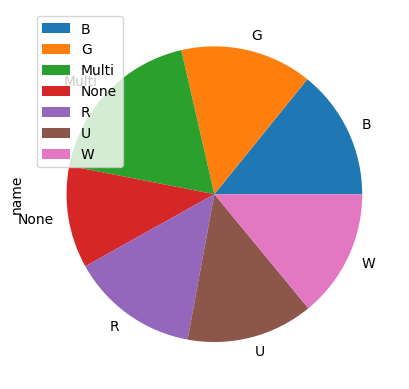

In [30]:
all_cards_df.groupby(['overall_color']).count().plot(kind='pie', y='name')